## Task 2: Exploratory Data Analysis
<font size="3"> **Background information**
    
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

- Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
- Historical pricing data: variable and fixed pricing data etc
- Churn indicator: whether each customer has churned or not

<font size="3"> **Task**

Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.


Sub-Task 3:

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

### Sub-Task 1

In [1]:
# load packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

C:\Users\guoyi\AppData\Local\Temp\ipykernel_8288\4015276315.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<font size="3"> client dataset feature descriptions
    
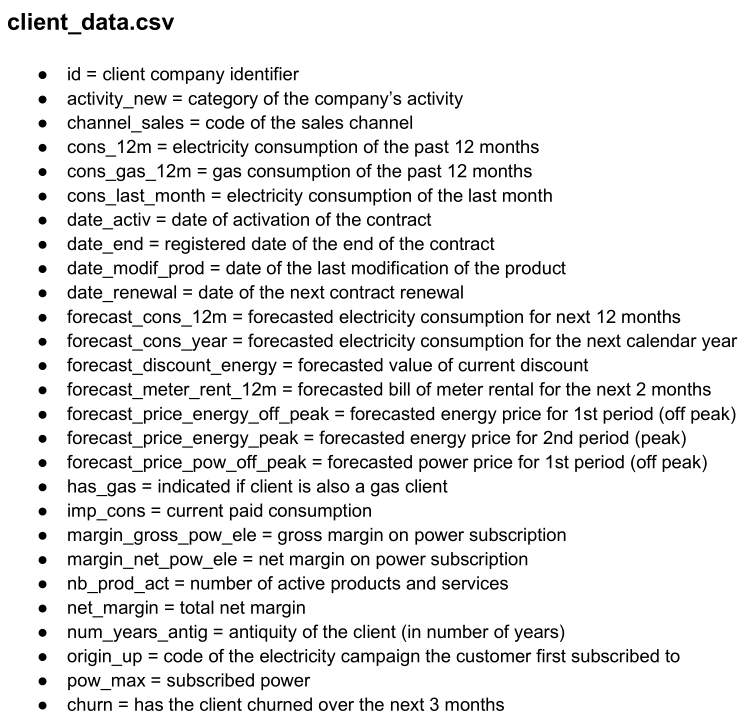

In [2]:
# load client dataset
client = pd.read_csv('client_data.csv')
client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


<font size="3"> Have a look at the general information on the client dataset

In [3]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

<font size="3"> There are 4 features related to date, it is better to convert them to datetime data type.

In [4]:
# convert datetime feature to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client[f] = pd.to_datetime(client[f])


<font size="3"> Add some new features from the above datetime features

In [5]:
#
client['contract_start_year'] = client['date_activ'].dt.year
client['contract_end_year'] = client['date_end'].dt.year

<font size="3"> First, check missing values and duplicate records.

In [6]:
# define a function to display missing values and dupliate rows
def duplicate_and_missing(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')

<font size="3"> There is no missing value or duplicate rows.

In [7]:
duplicate_and_missing(dataset=client, dataset_name='Client')

There are 14606 rows and 28 columns in the dataset "Client" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



<font size="3"> Then check consistency of features' values.

In [8]:
# 
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

<font size="3"> There seems no consistency issues.

In [9]:
describe_categorical(dataset=client)

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413

<font size="3"> But values of "channel_sales" and "origin_up" are not understandable, so I convert these features to numeric data type by label encoding.

In [10]:
# label encoding
channel_encoder = LabelEncoder()
client['channel_sales'] = channel_encoder.fit_transform(client['channel_sales'])
origin_encoder = LabelEncoder()
client['origin_up'] = origin_encoder.fit_transform(client['origin_up'])

<font size="3"> Now, let's check numeric features.

In [11]:
# dataset: a pandas dataframe;
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

<font size="3"> There seems no issues either.

In [12]:
describe_numeric(dataset=client)

Numeric variables are ['channel_sales', 'origin_up', 'contract_start_year', 'contract_end_year', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
   channel_sales  count  proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137 
--------------------------------------------------------------------------------
   origin_up  count  proportion
0          4   7097    0.485896
1          2   4294    0.293989
2          3   3148    0.215528
3          0     64    0.004382
4          5      2    0.000137
5          1      1    0.000068 
-----------------

<font size="3"> Check datetime features. There seems no issue.

In [13]:
client[client.dtypes[client.dtypes=='datetime64[ns]'].index.tolist()].describe()

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


<font size="3"> Let's view price dataset. The picture below shows the feature descriptions.
    
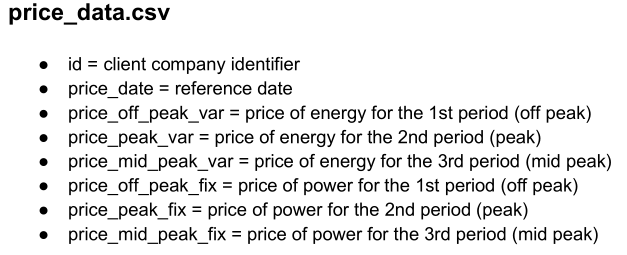

In [14]:
# load price dataset
price = pd.read_csv('price_data.csv')
price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


<font size="3"> Check the general information.

In [15]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


<font size="3"> Convert datetime feature to datetime data type

In [16]:
price['price_date'] = pd.to_datetime(price['price_date'])

<font size="3"> There seems no issues.

In [17]:
duplicate_and_missing(dataset=price, dataset_name='Client')

There are 193002 rows and 8 columns in the dataset "Client" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



In [18]:
describe_categorical(dataset=price)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------


In [19]:
describe_numeric(dataset=price)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


In [20]:
price['price_date'].describe()

count                           193002
mean     2015-06-16 12:50:49.933161216
min                2015-01-01 00:00:00
25%                2015-04-01 00:00:00
50%                2015-07-01 00:00:00
75%                2015-10-01 00:00:00
max                2015-12-01 00:00:00
Name: price_date, dtype: object

<font size="3"> Now, let's get insights from data by data visualization

In [21]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

<font size="3"> Around 9.72% of the customers change their providers.

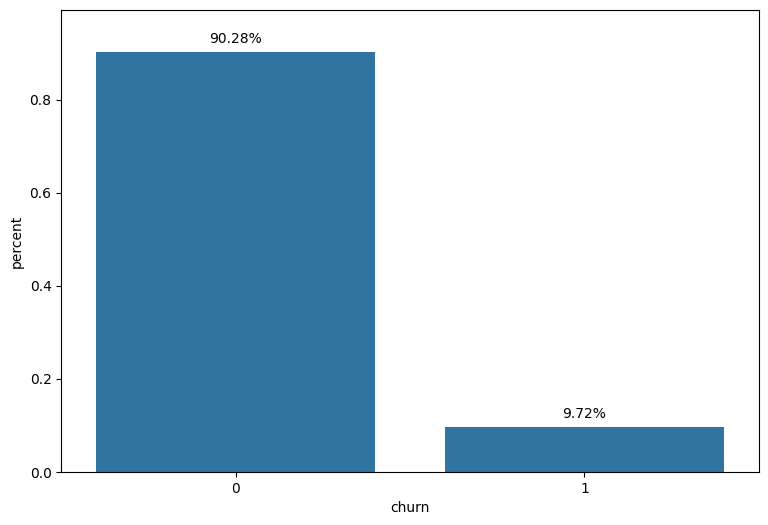

In [22]:
plot_bar_chart_with_percent_label(df=client, target_variable='churn', gap_label_bar=0.02)

<font size="3"> Let's check categorical features' distribution. (Note: Discrete numeric features actually can be seen as categorial features representing the categories.)

<font size="3"> Type 4 is the most common sales channel. Type 1, 3 and 6 sales channels are very rare.

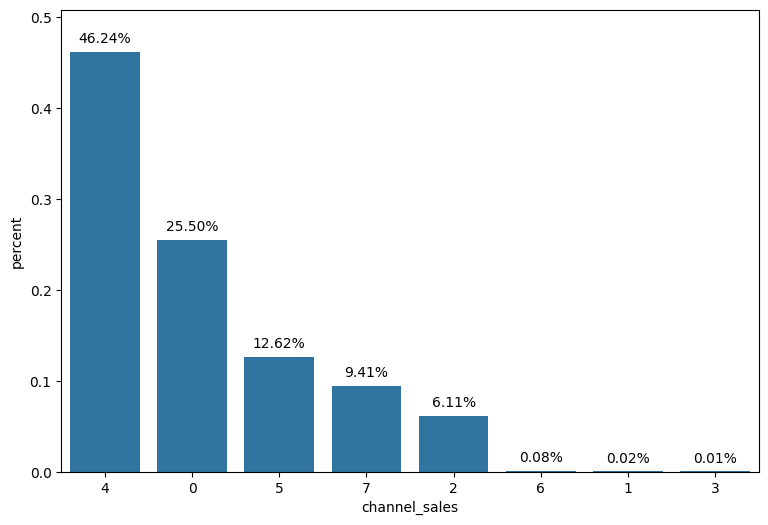

In [23]:
plot_bar_chart_with_percent_label(df=client, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)

<font size="3"> Type 4 is the most common electricty campaign that customers first subscribed to. Very few customers first subscribed to Type 0, 1 and 5 electricity campaign. 

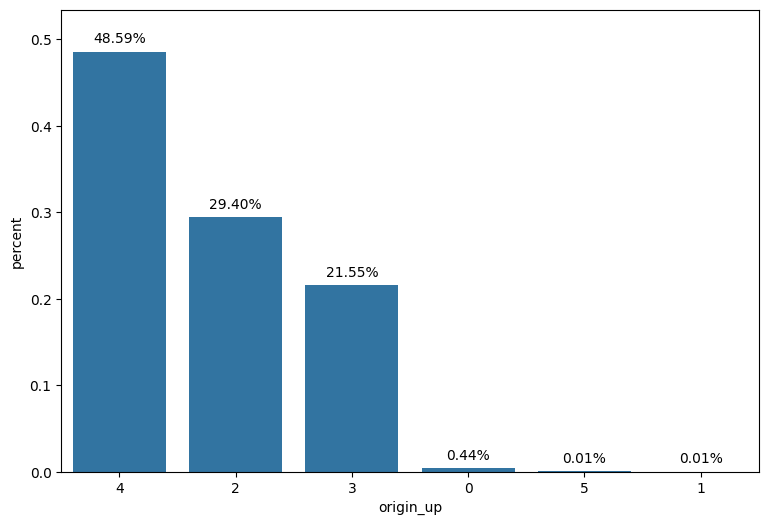

In [24]:
plot_bar_chart_with_percent_label(df=client, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

<font size="3"> Plot stacked bar charts to show the feature distribution about the churning customers and non-churning customers.

<font size="3"> For the customers from different sales channels, the proportion of churning customers ranges from 5.6% to 12.1% (excluding rare channels). 

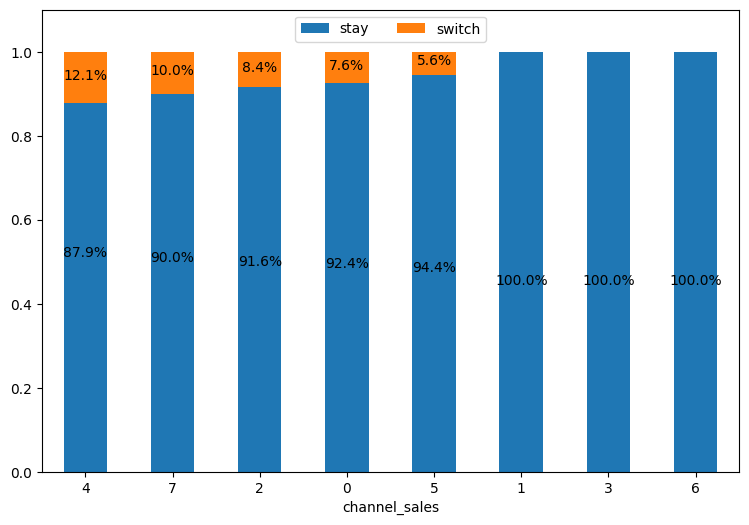

In [25]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='channel_sales', if_sort=True)

<font size="3"> For the customers who first subscribed to different electricity campaigns, the proportion of churning customers ranges from 6.0% to 12.6% (excluding type 1 and type 5). 

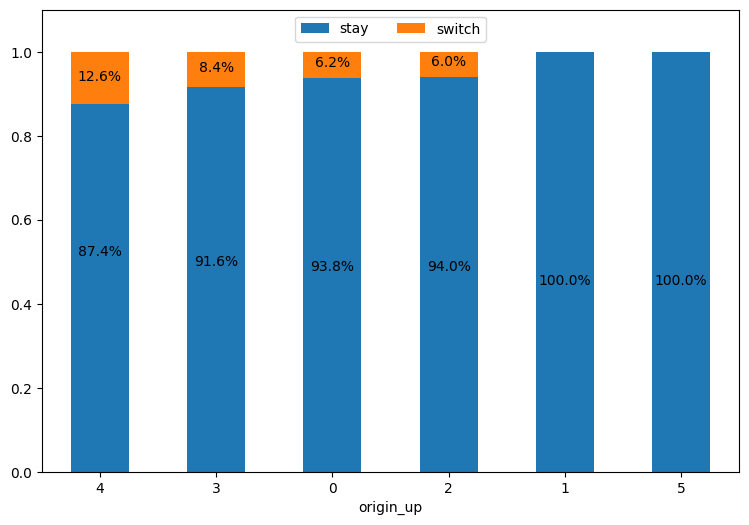

In [26]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='origin_up', if_sort=True)

<font size="3"> Most cutomers started their contracts from 2009 to 2013. Among these cutomers, it seems newer customers are more likely to switch to other providers.

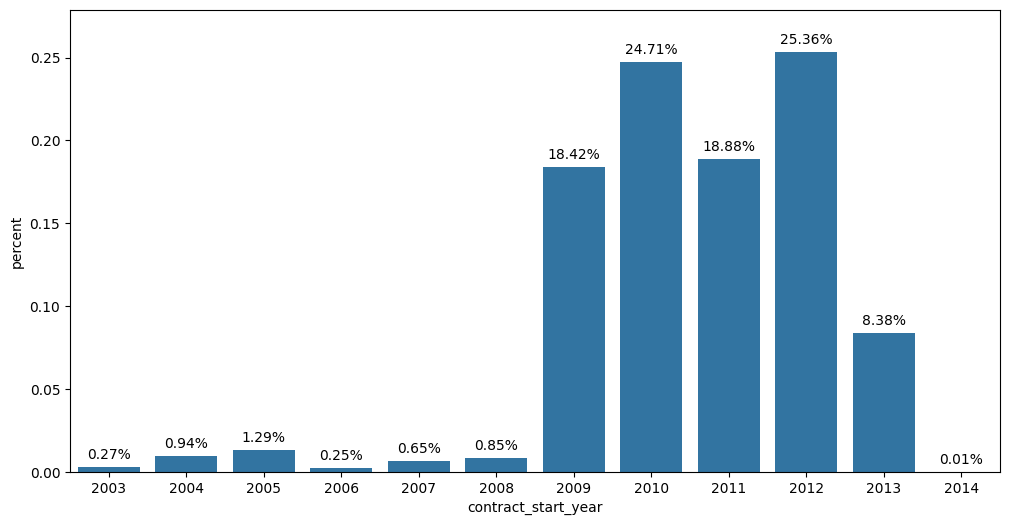

In [27]:
plot_bar_chart_with_percent_label(df=client, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

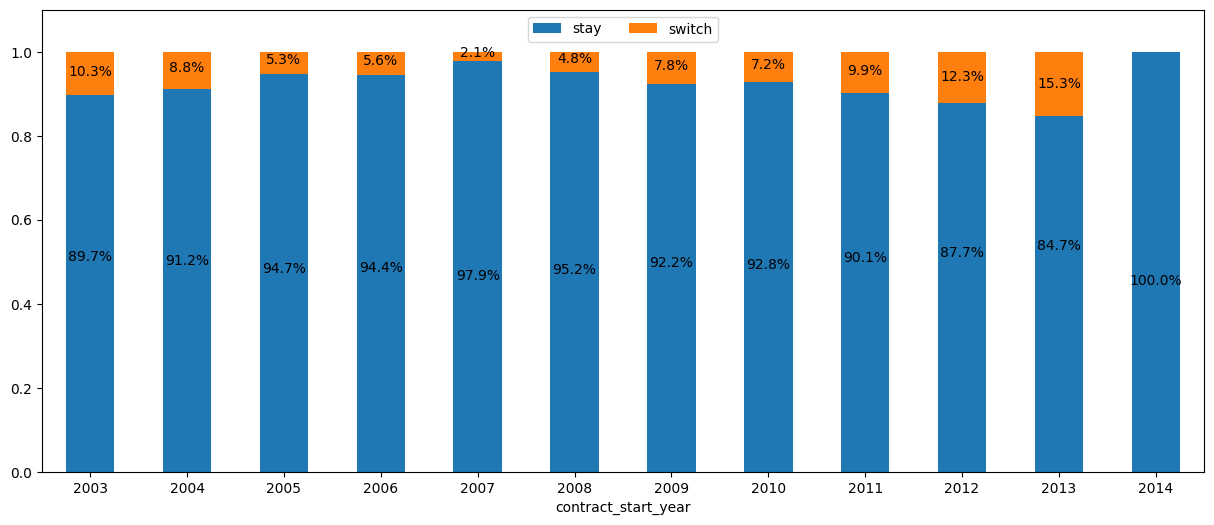

In [28]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

<font size="3"> Most cutomers stayed with the current providers for 3 to 6 years. Among these customers, it seems newer customers are more likely to switch to other providers. 

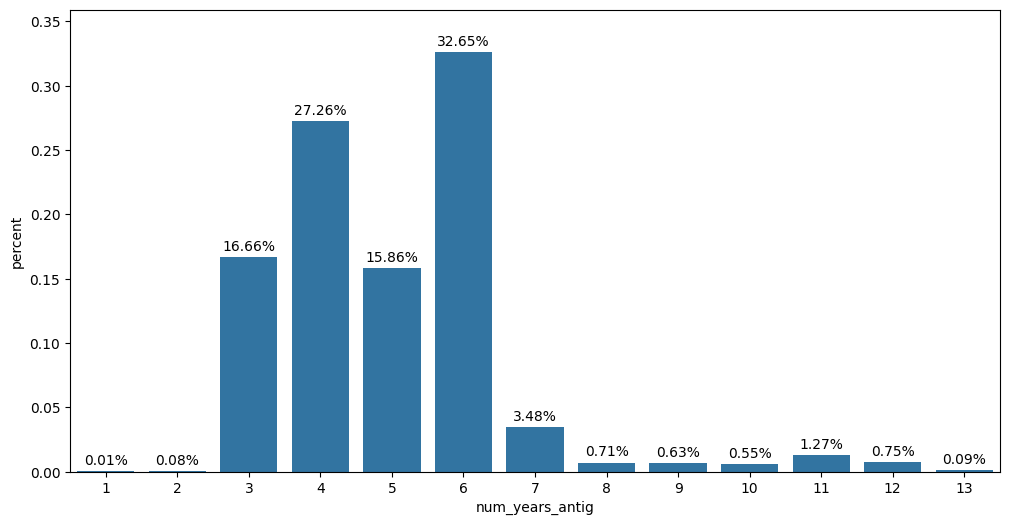

In [29]:
plot_bar_chart_with_percent_label(df=client, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

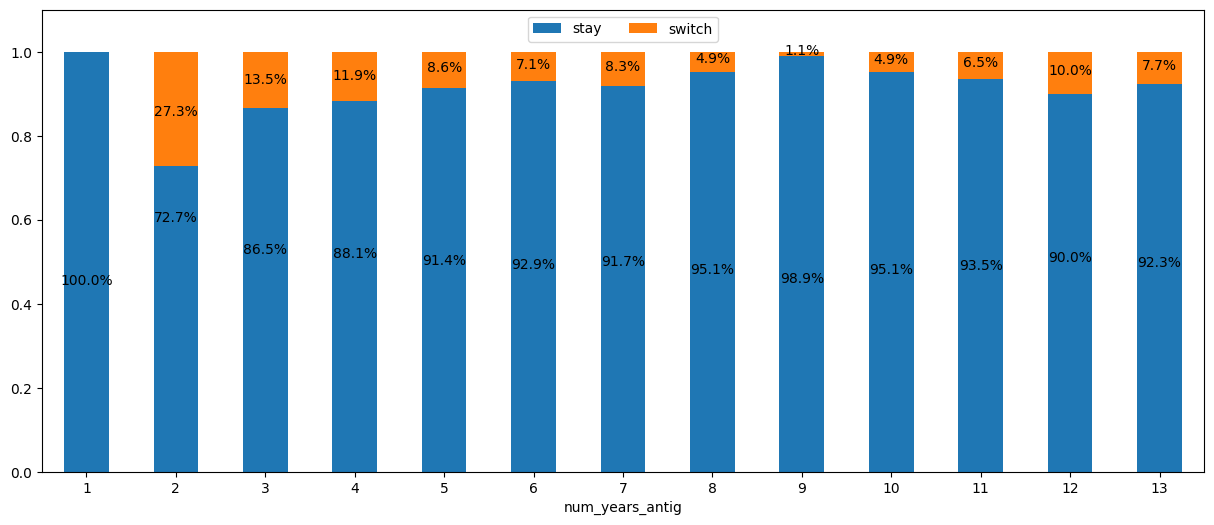

In [30]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

<font size="3"> The vast majority of cutomers' forecasted value of current discount is 0.

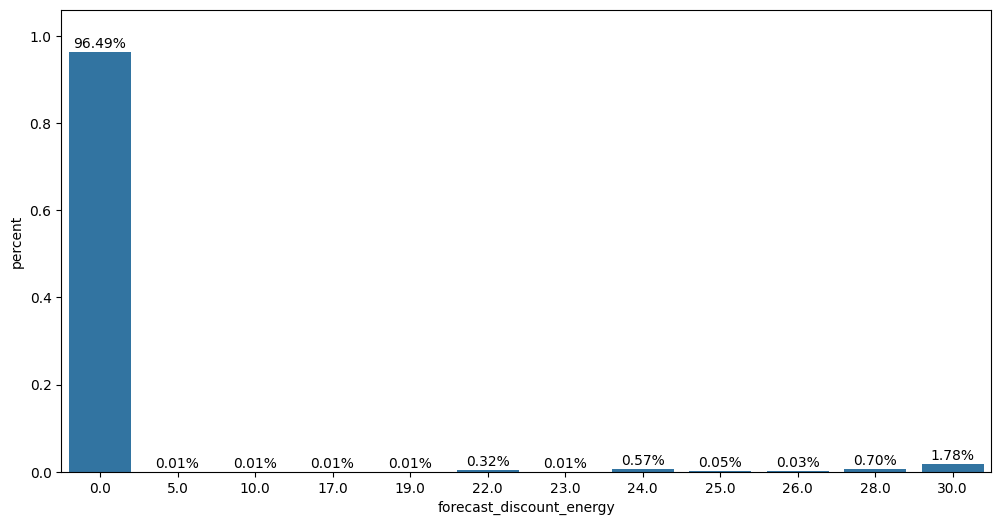

In [31]:
plot_bar_chart_with_percent_label(df=client, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))

<font size="3"> Only 18.15% of the clients were also gas clients.

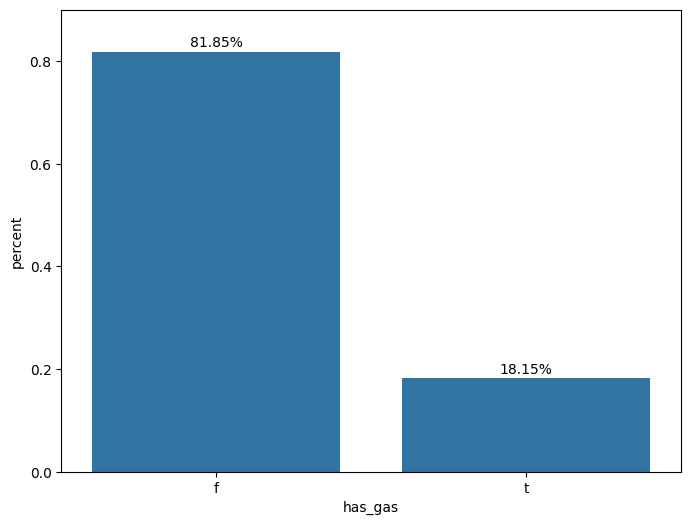

In [32]:
plot_bar_chart_with_percent_label(df=client, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

<font size="3"> Electricity clients are more likely to churn than electricity and gas clients.

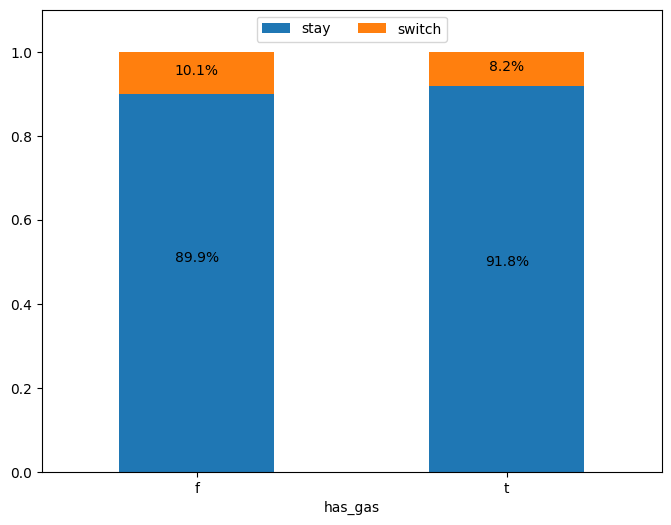

In [33]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='has_gas', if_sort=False, figsize=(8,6))

<font size="3"> Most customers only had 1 or 2 active products and services.

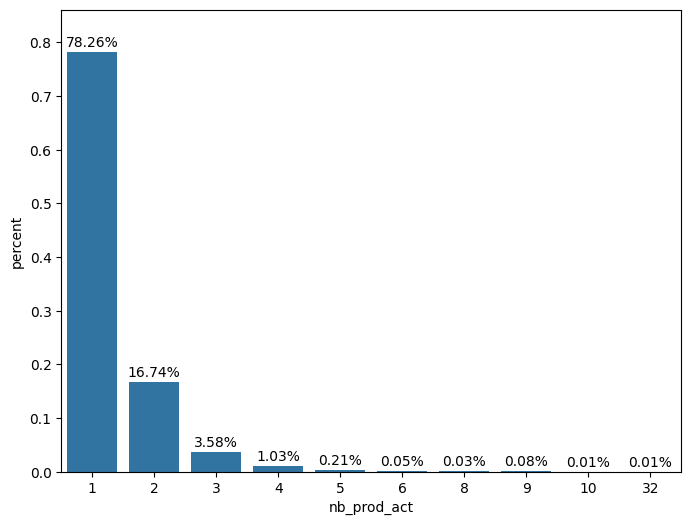

In [34]:
plot_bar_chart_with_percent_label(df=client, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

<font size="3"> Plot histograms  the distribution of continous numeric features. 

In [35]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

<font size="3"> Plot histograms of energy consuption features. Each distribution has very long tail, which can be seen as the outliers.

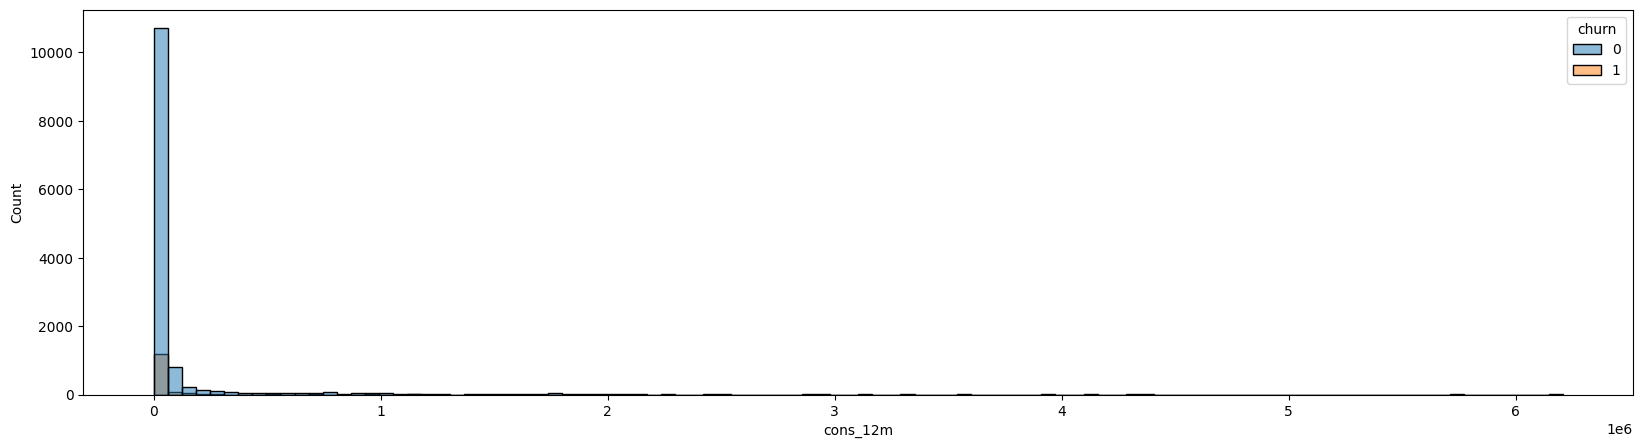

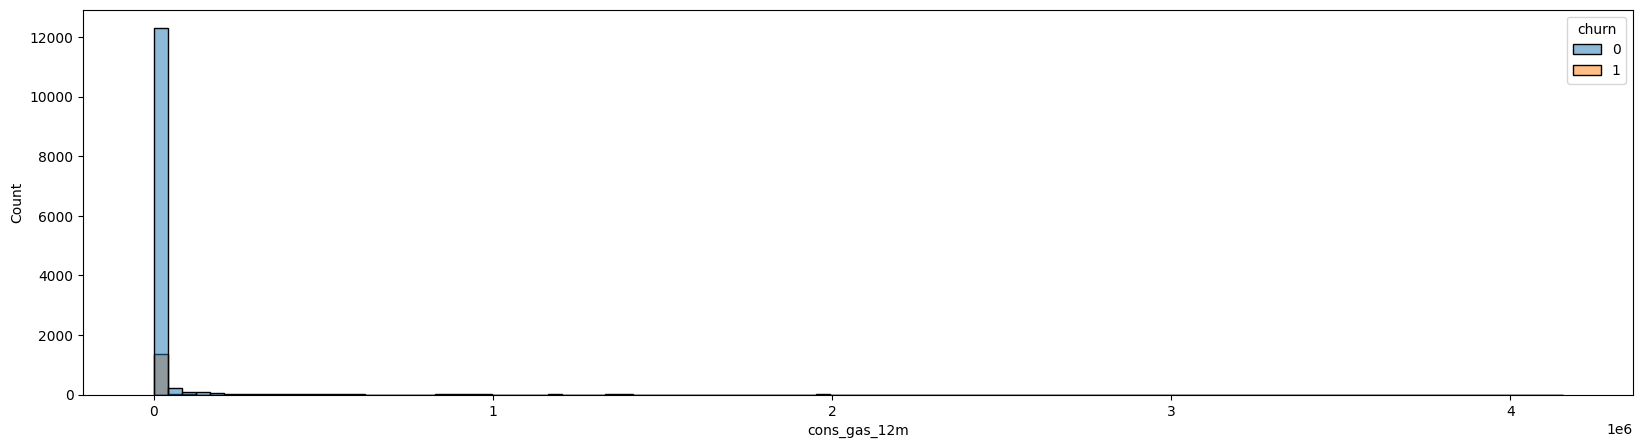

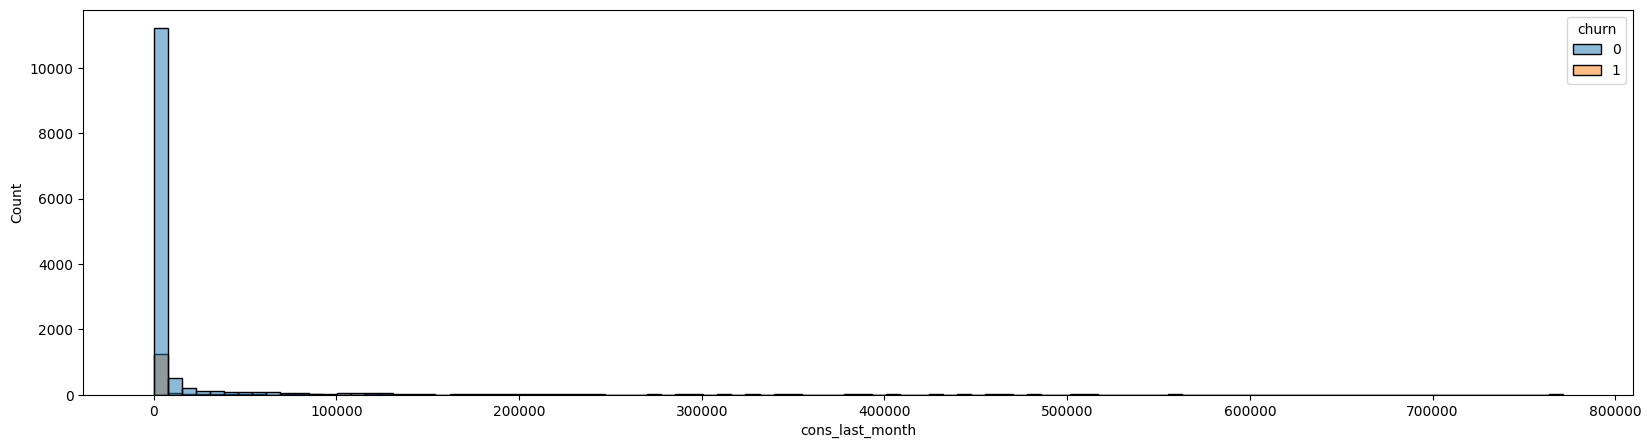

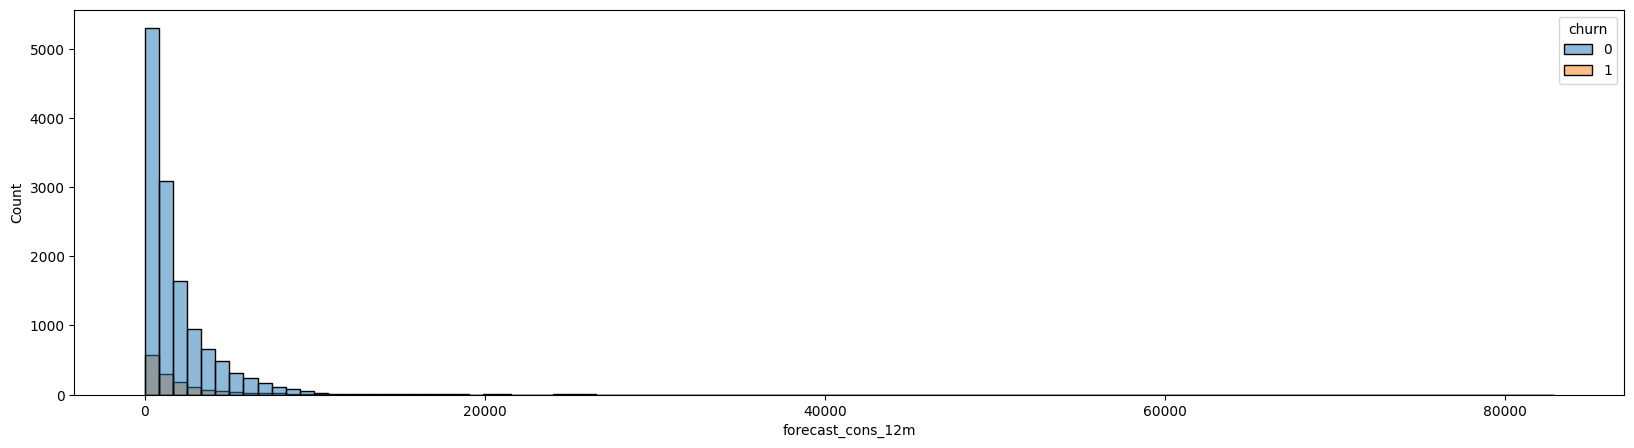

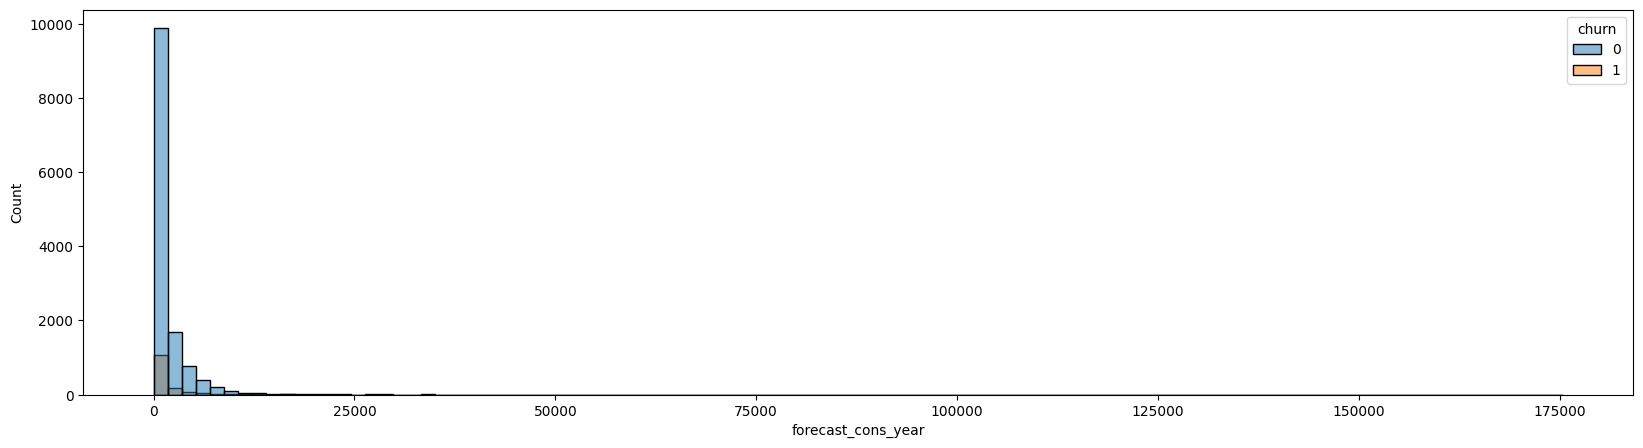

In [36]:
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client, target_variable=attr)

<font size="3"> Let's view price dataset
    
<font size="3"> We can see not all customers have the same number of price records. The vast majority of customers have 12 price reocrds and very few customers has less than 12 records.


In [37]:
price['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

<font size="3"> Combined with the above findings, most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

In [38]:
price['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

<font size="3"> Plot histograms of price features. The values of each feature are centred around some points.

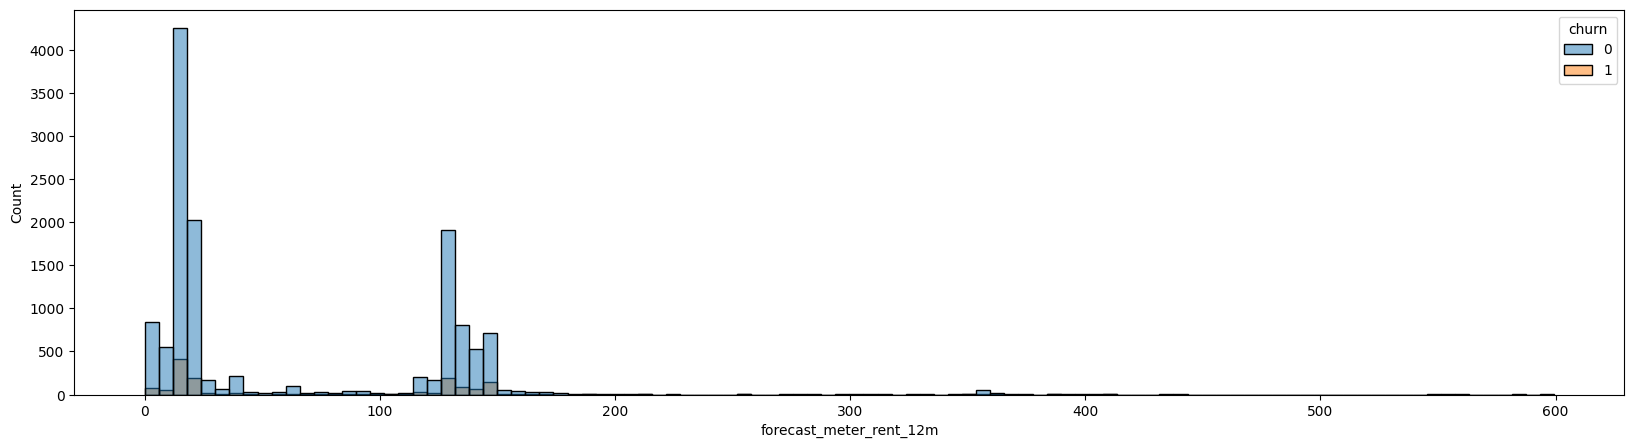

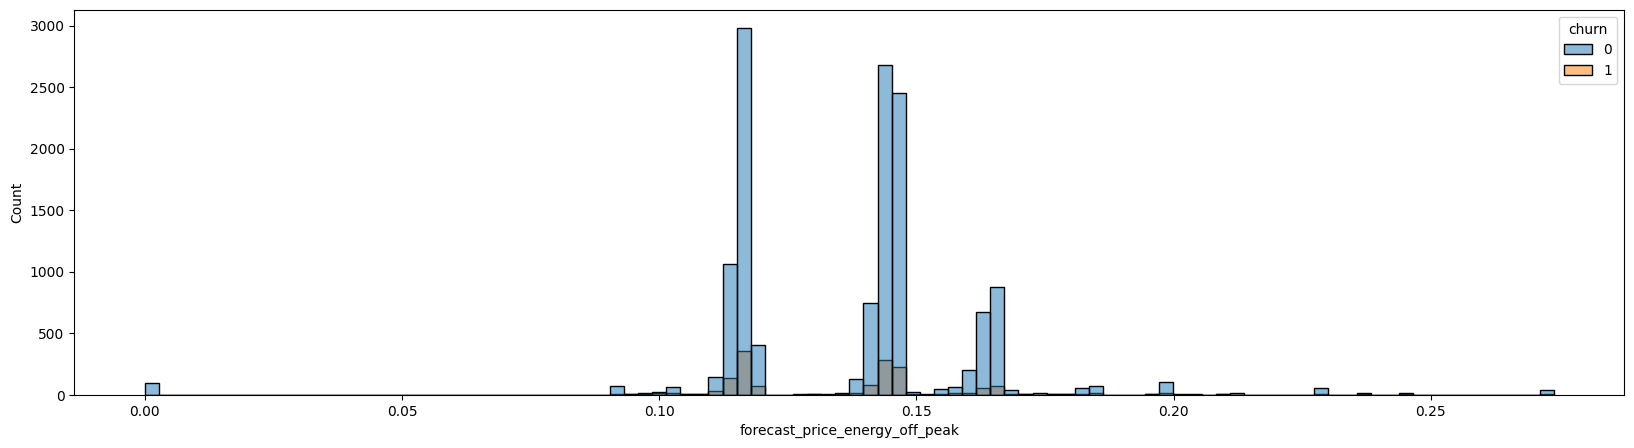

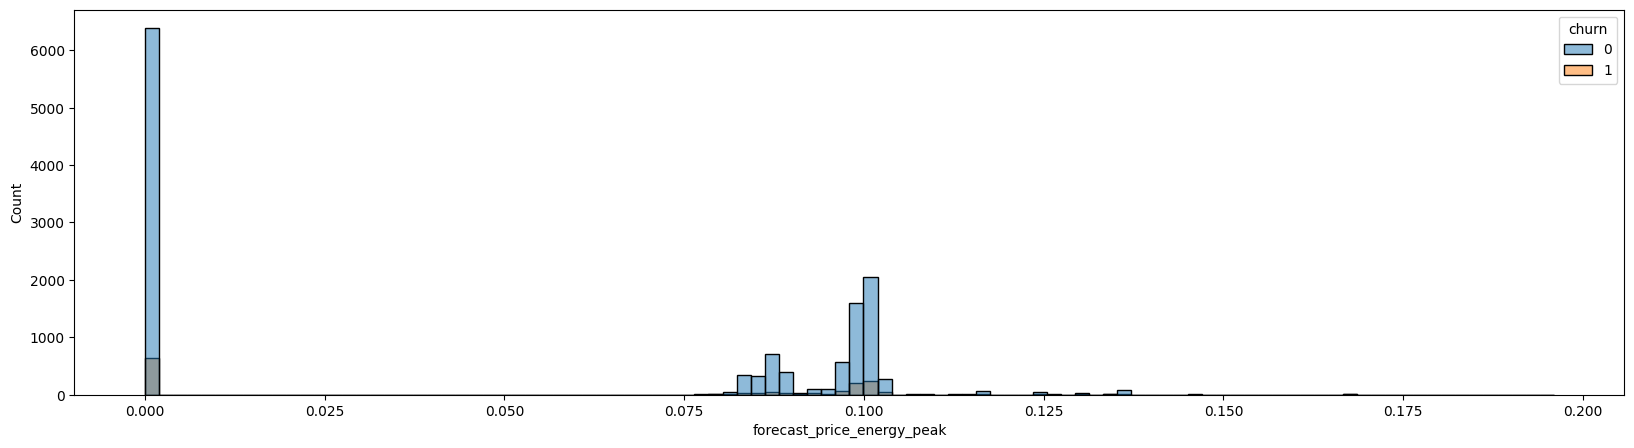

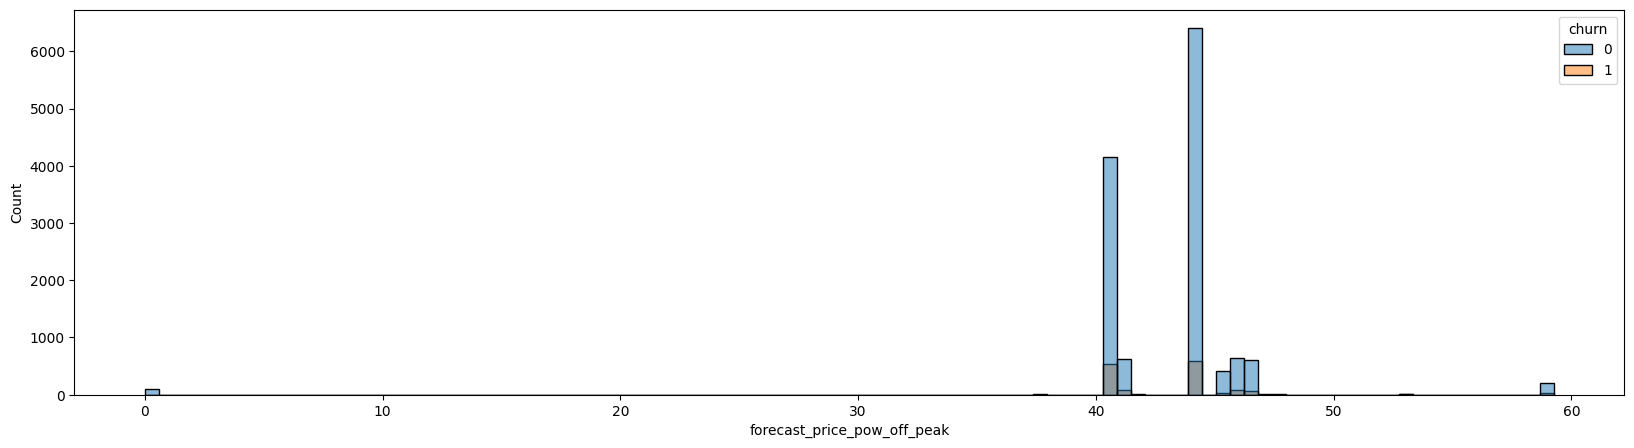

In [39]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    plot_histogram_by_churn(df=client, target_variable=attr)

<font size="3"> Other features also display significantly skewed distribution.

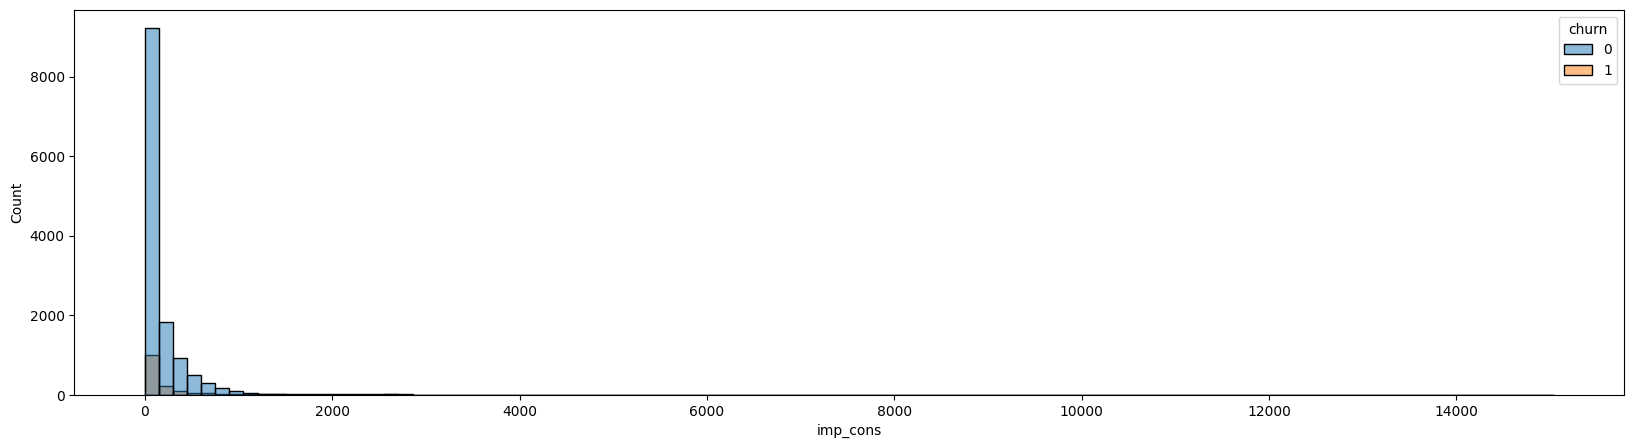

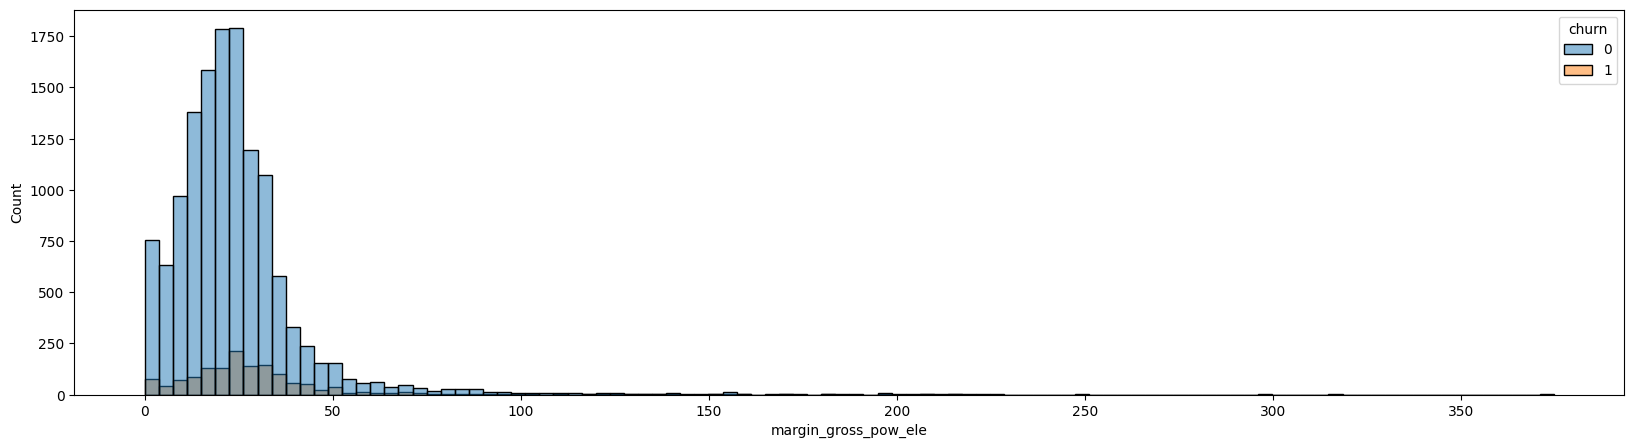

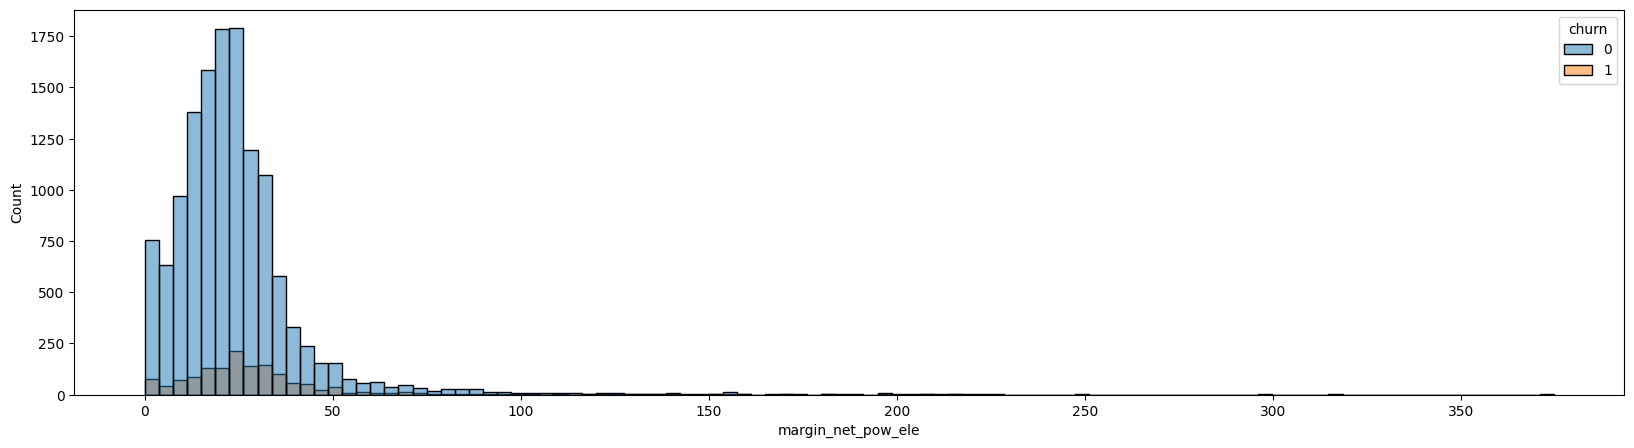

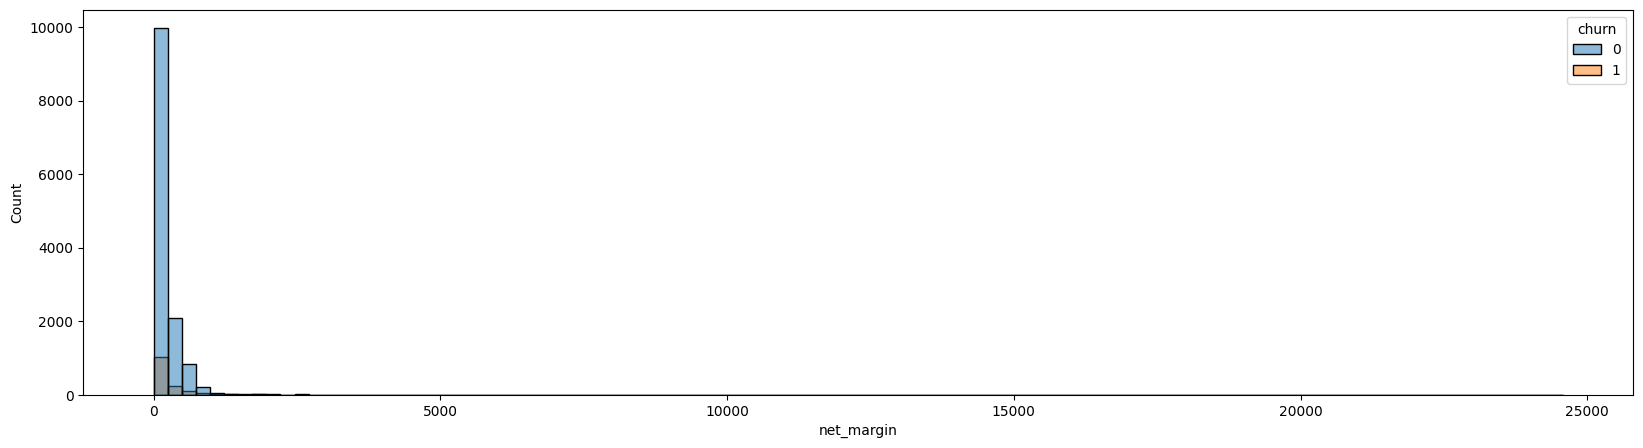

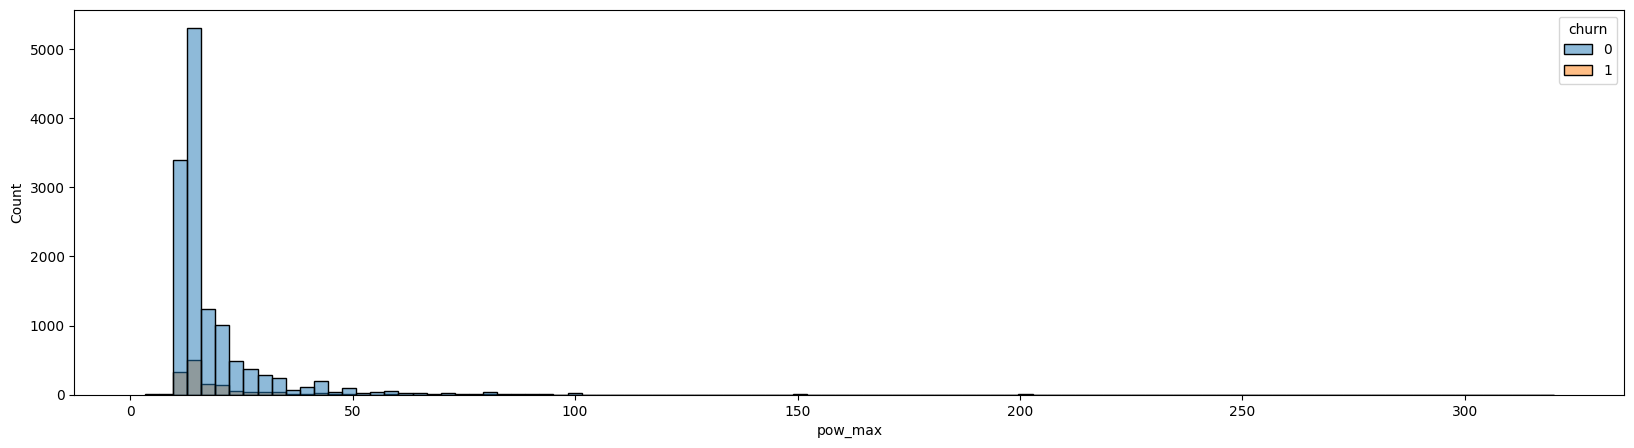

In [40]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client, target_variable=attr)

<font size="3"> Let's have a look at distribution of price dataset. There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices.

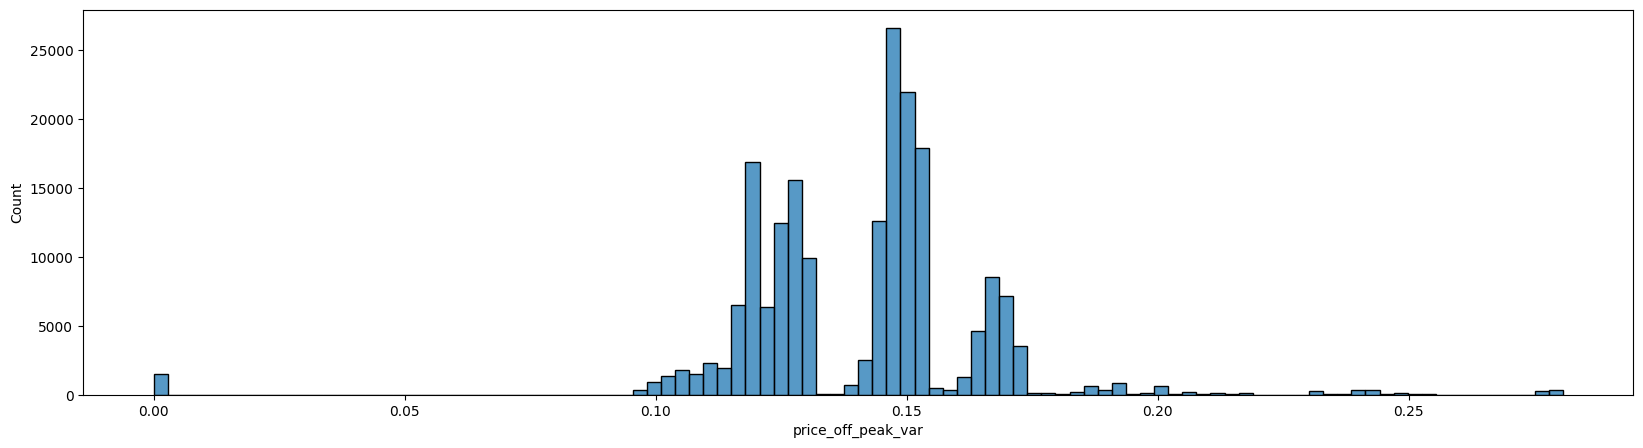

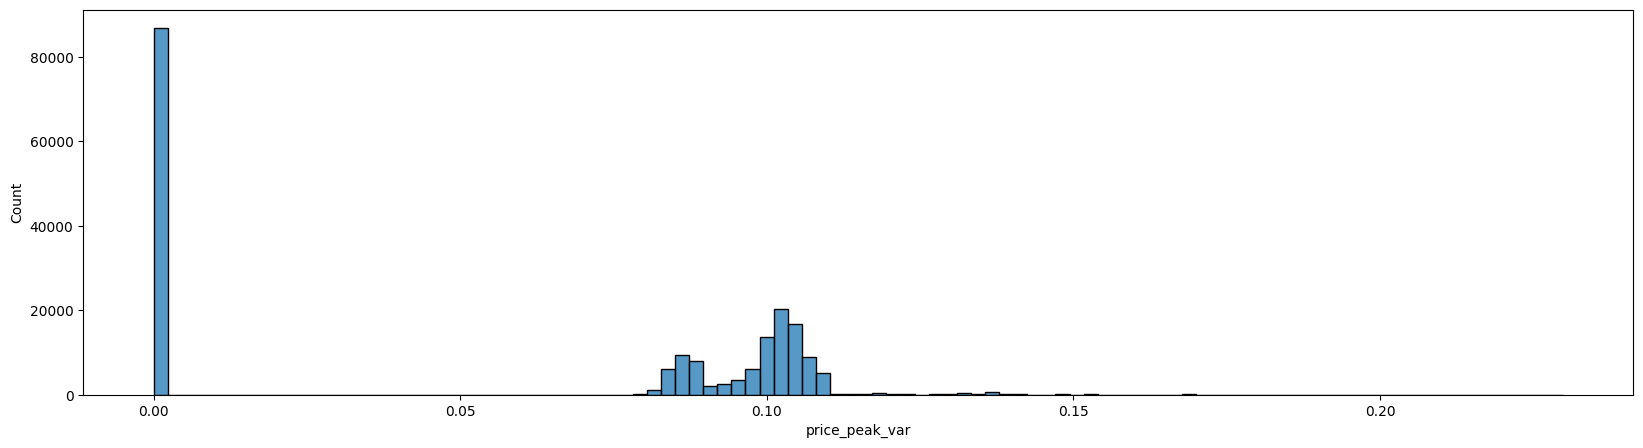

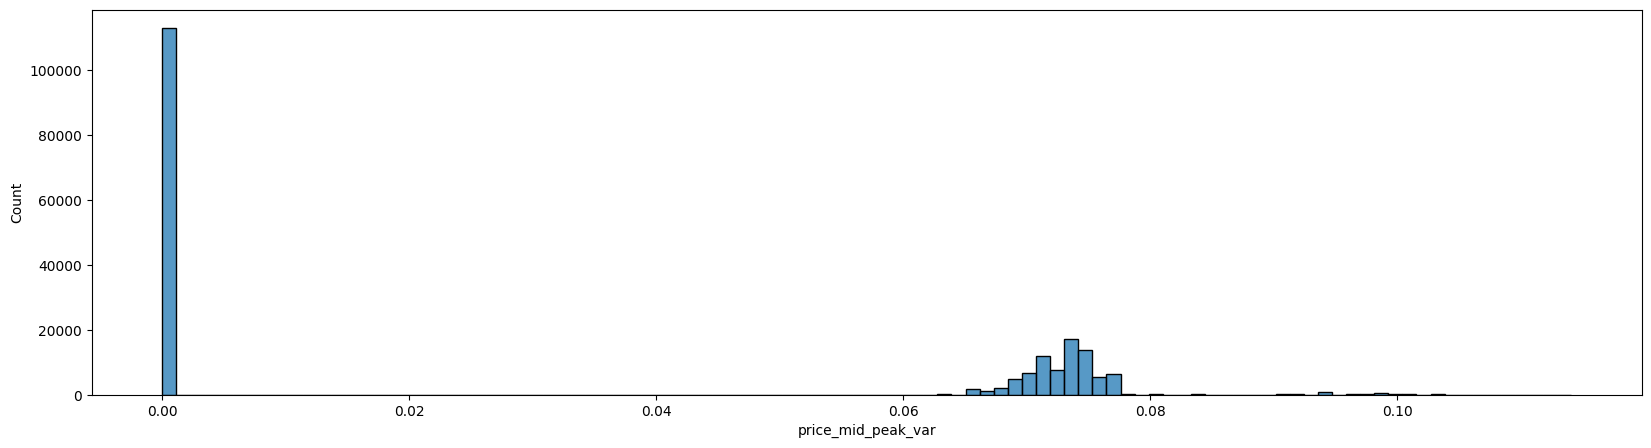

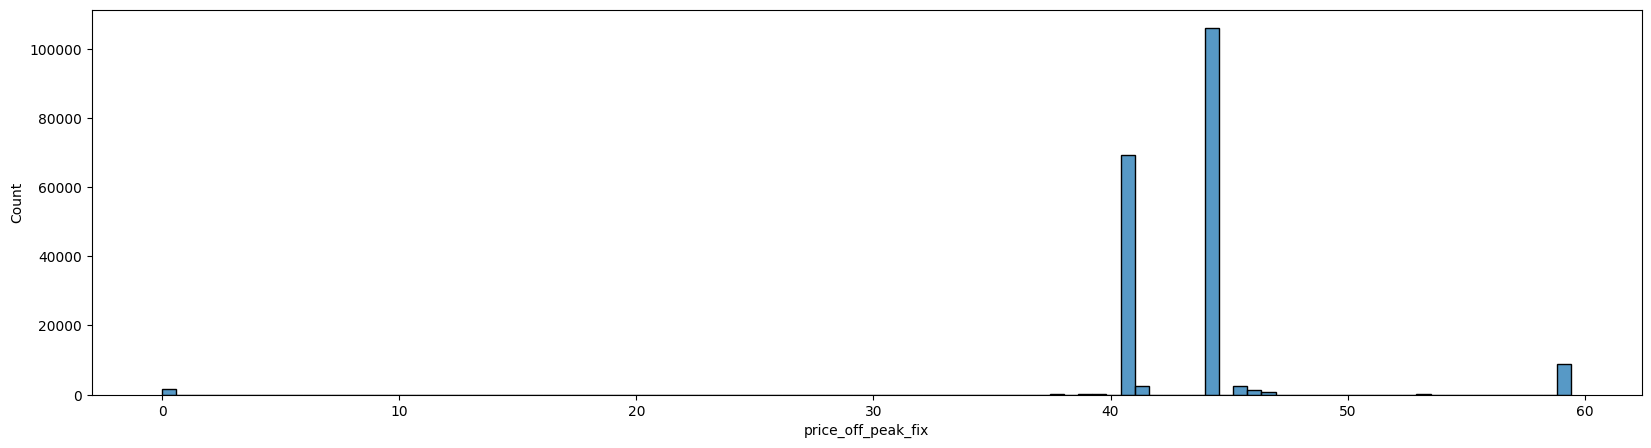

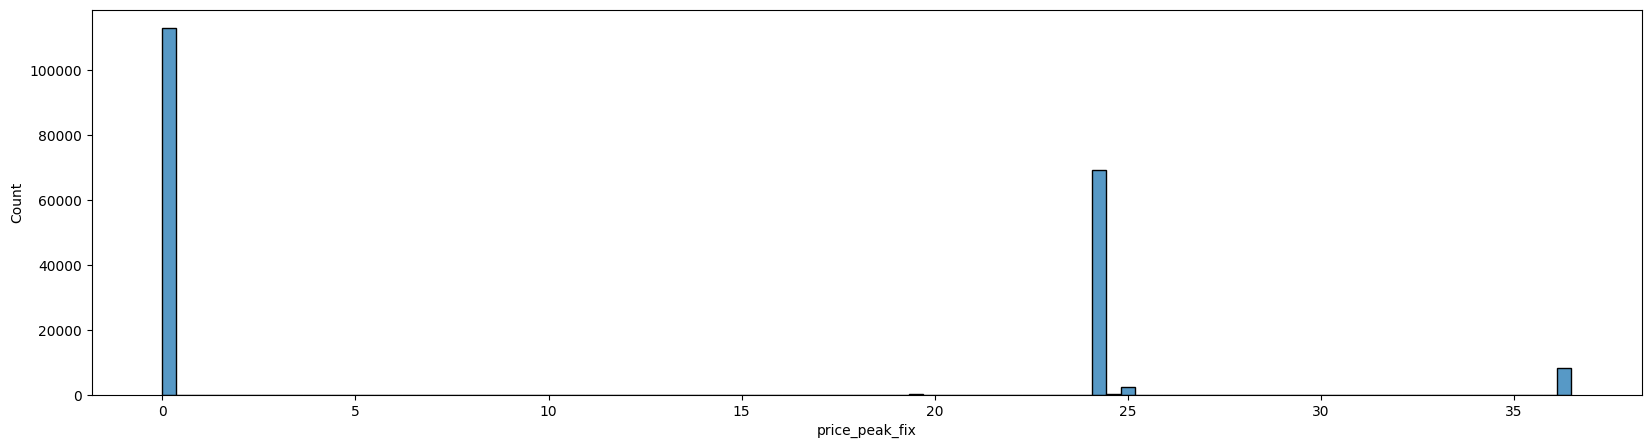

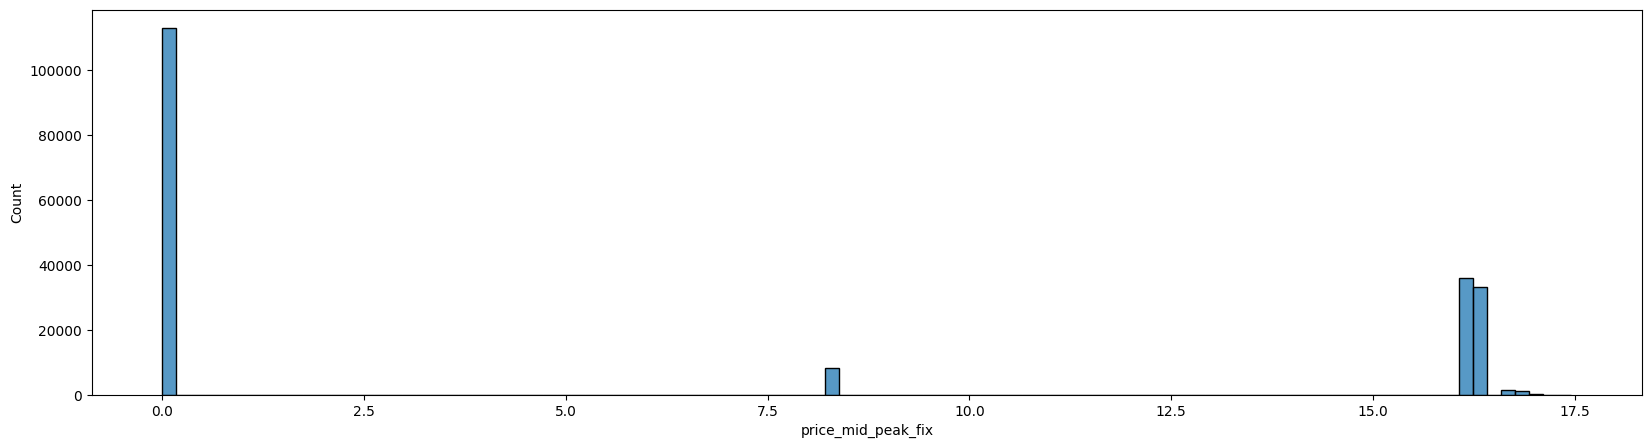

In [41]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price, target_variable=attr, if_churn=False)

### Sub-Task 2
<font size="3"> Now, let's check customers sensitivity to price. (Note: Normally, assuming other factors do not change, when the price increases and some cutomers switch, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. But, if there is a decrease or no change in the price and cutomers still change their proveiders, I think in this case we cannot say these cutomers are sensitive to price.)

<font size="3"> Calculate maximum, minimum and average prices over the whole year

In [42]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


<font size="3"> Merge client dataset to the above dataset to add churn data

In [43]:
# add churn values
price_stat = price_stat.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<font size="3"> Calculate the biggest changes in prices over the whole year.

In [44]:
# 
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


<font size="3"> Most cutomers' prices did not change much and kept stable.

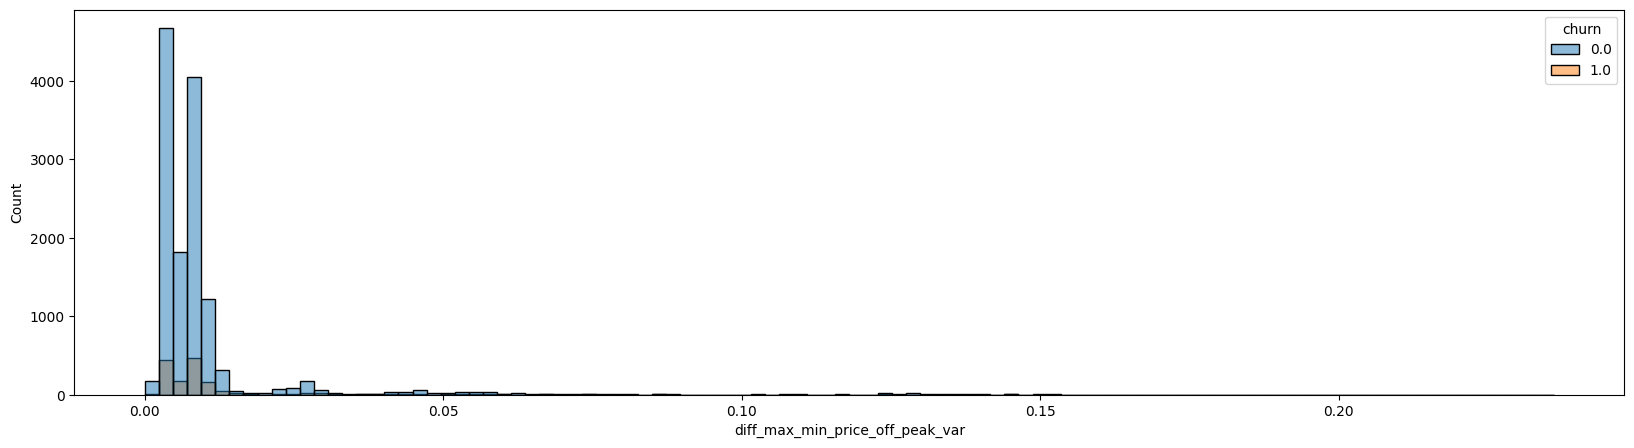

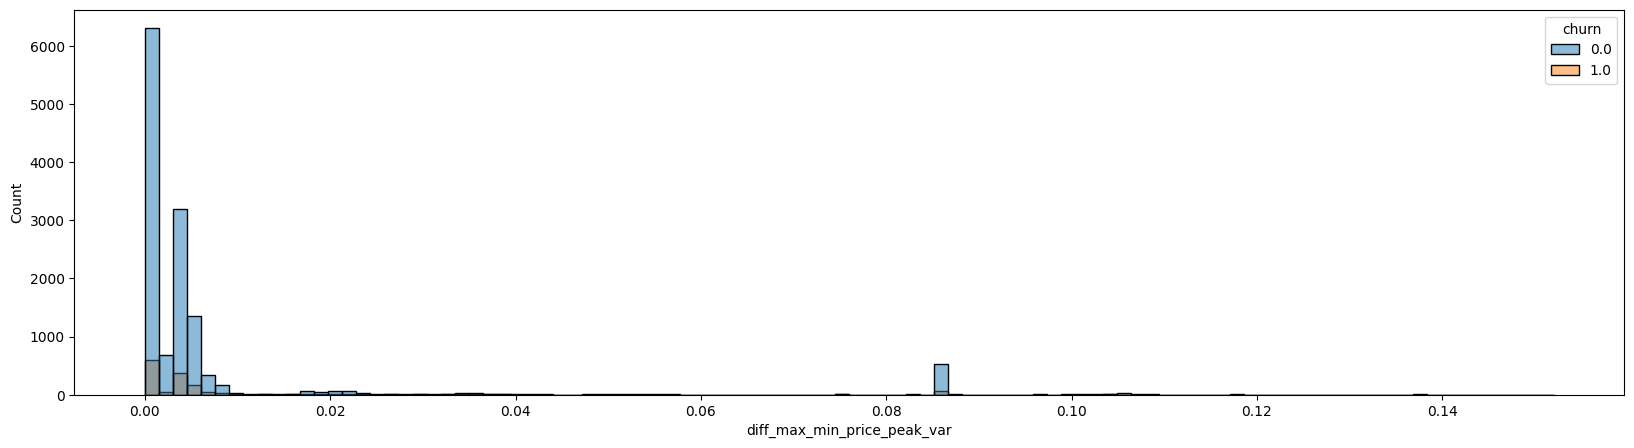

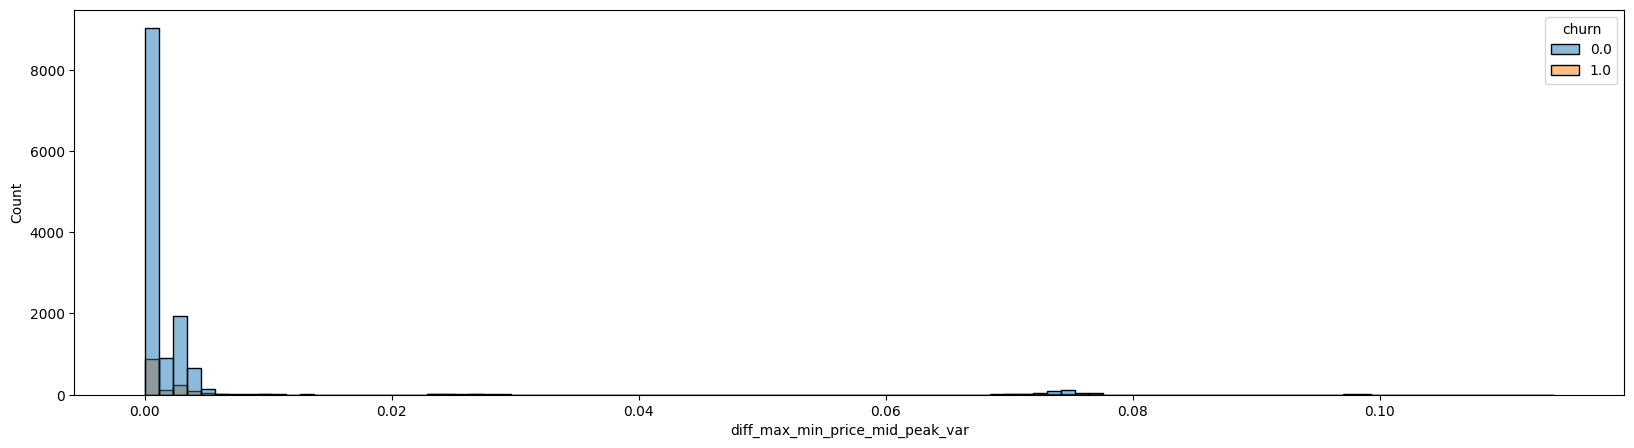

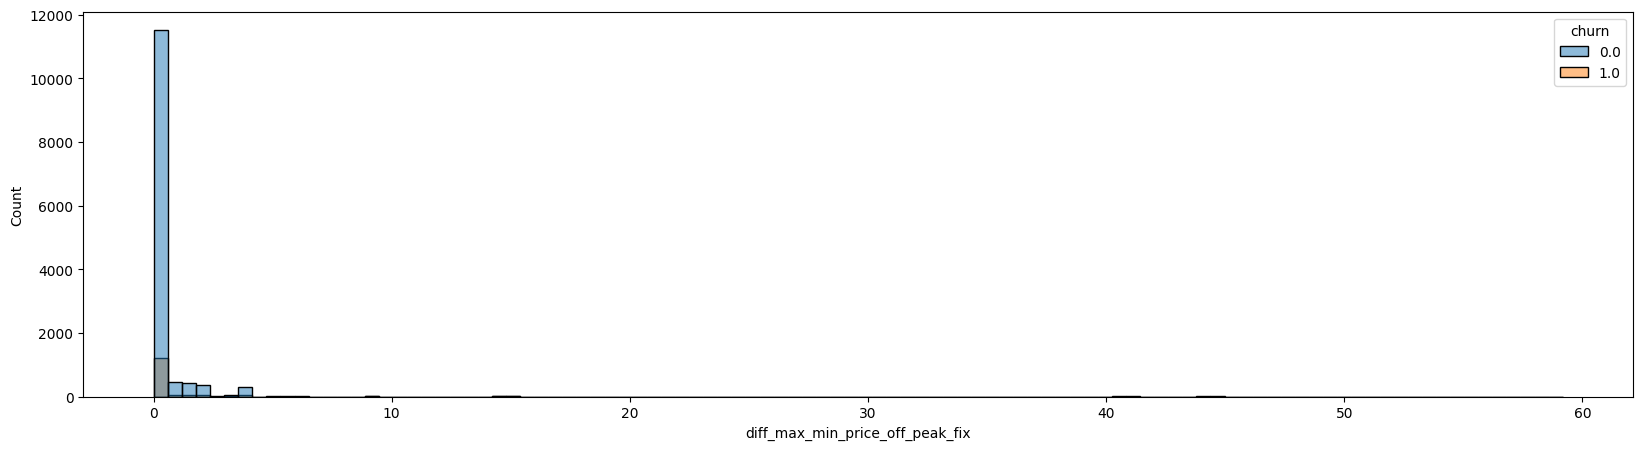

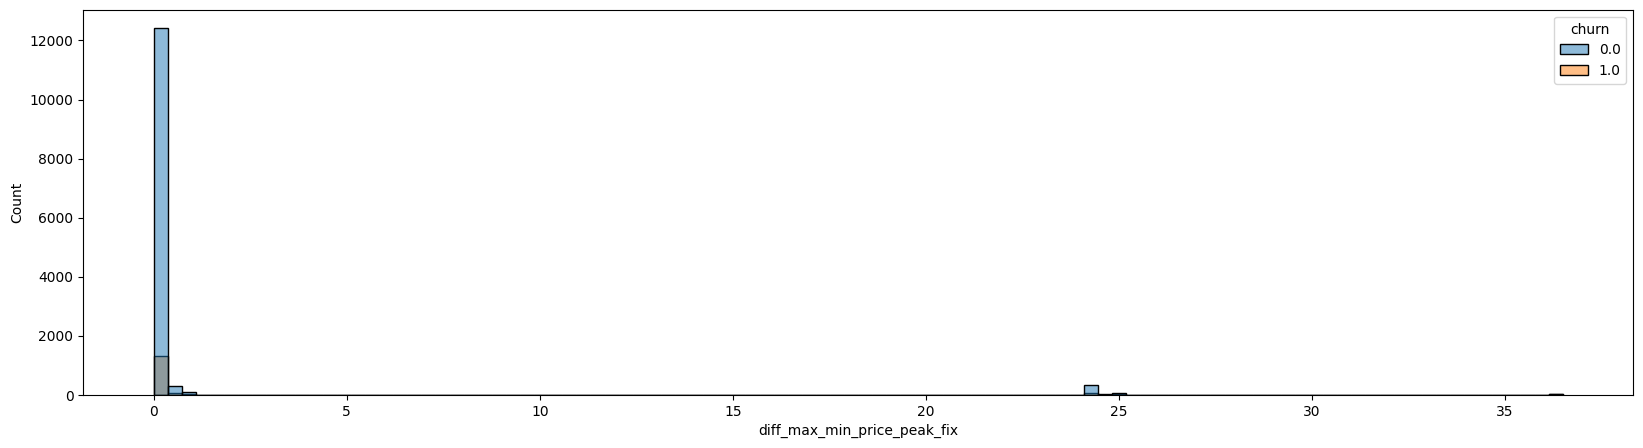

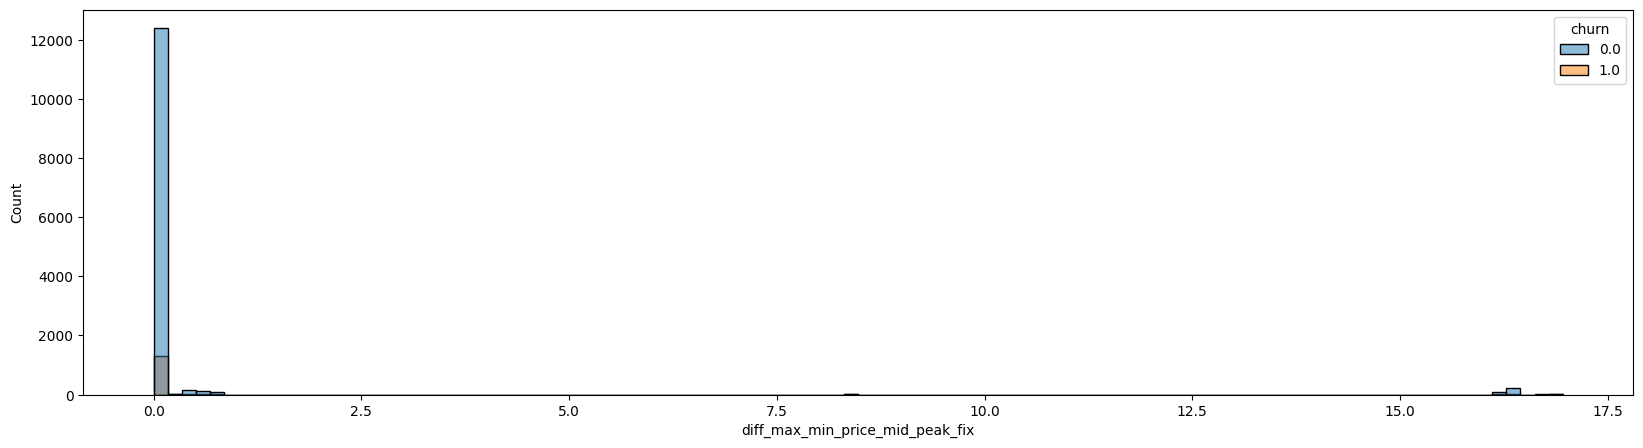

In [45]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

<font size="3"> Calculate the difference between the price last month (2015-12-01) and mean price.

In [46]:
# add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,0.021521,-0.103794,-0.073160,3.742978,-24.421038,-16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000,-0.027671,0.101071,0.075096,-3.656565,24.437330,16.291555
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,-0.037615,0.000000,0.000000,-0.875000,0.000000,0.000000


<font size="3"> Most cutomers' prices last month were very close to the mean prices over the whole year.

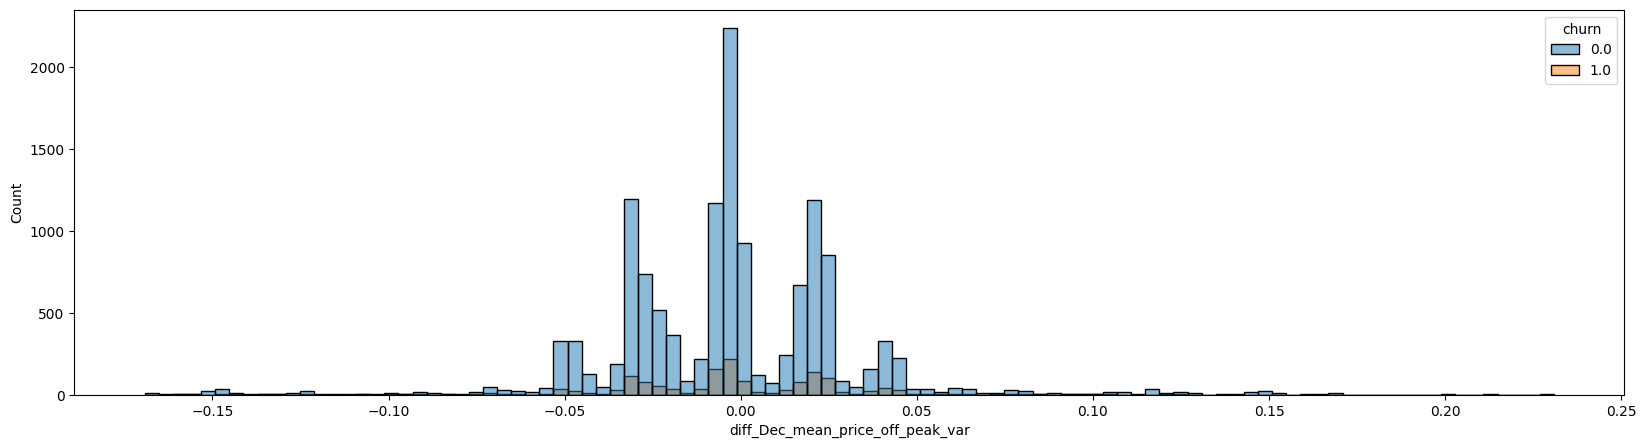

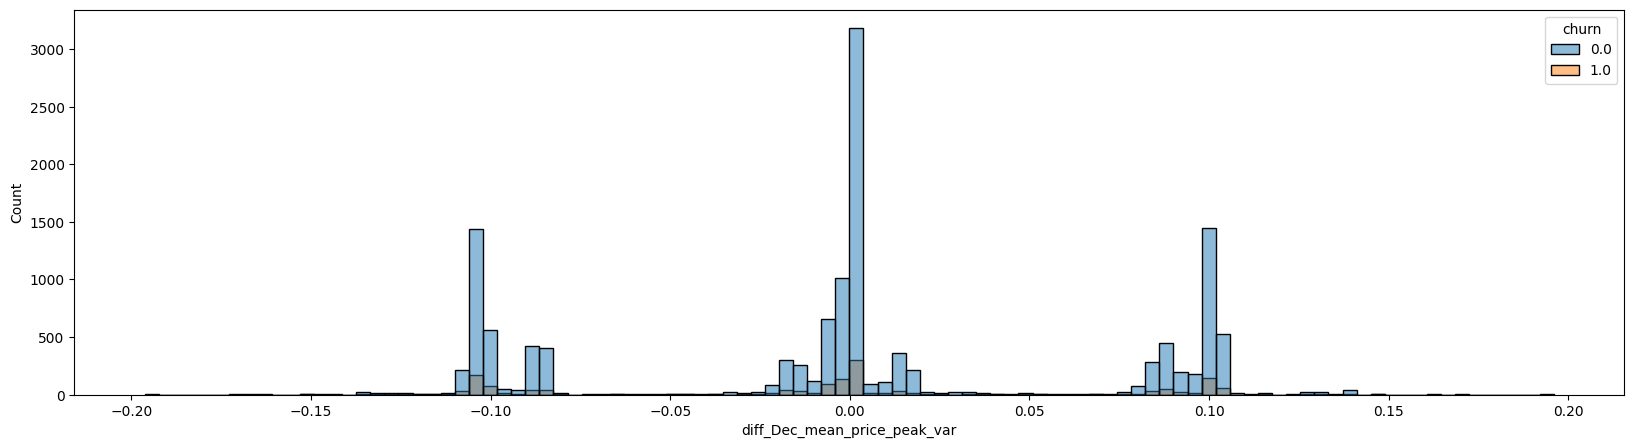

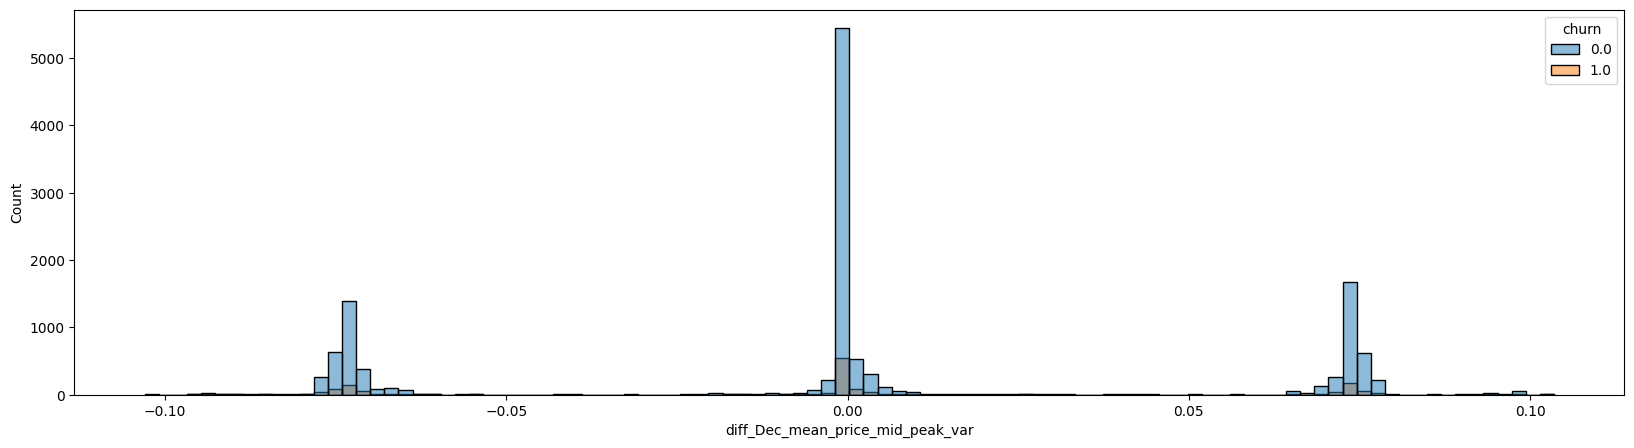

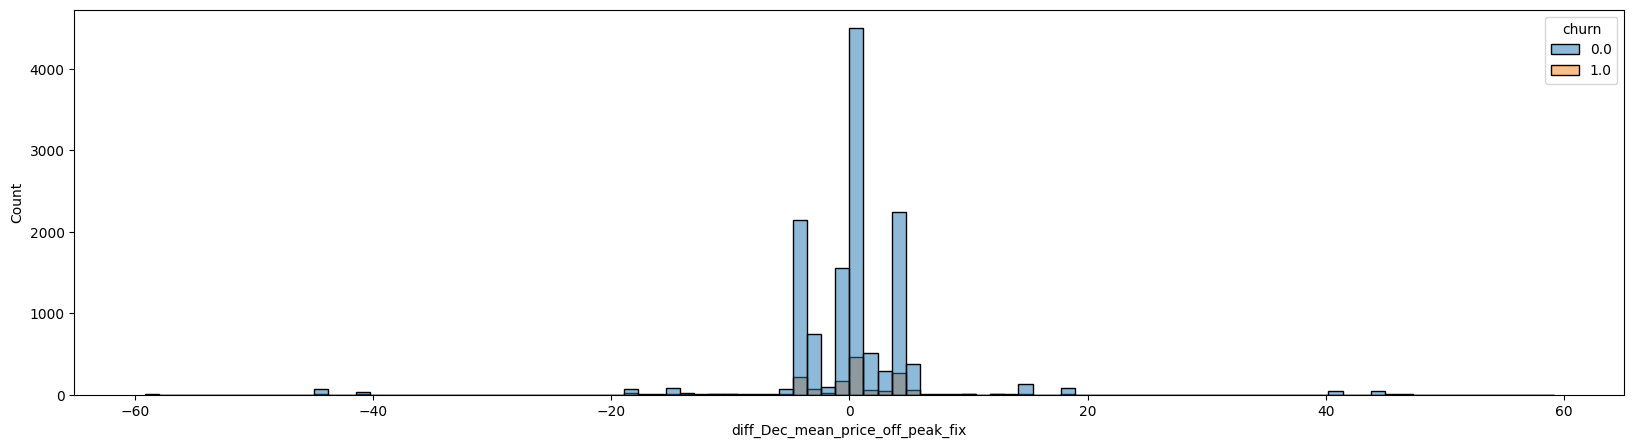

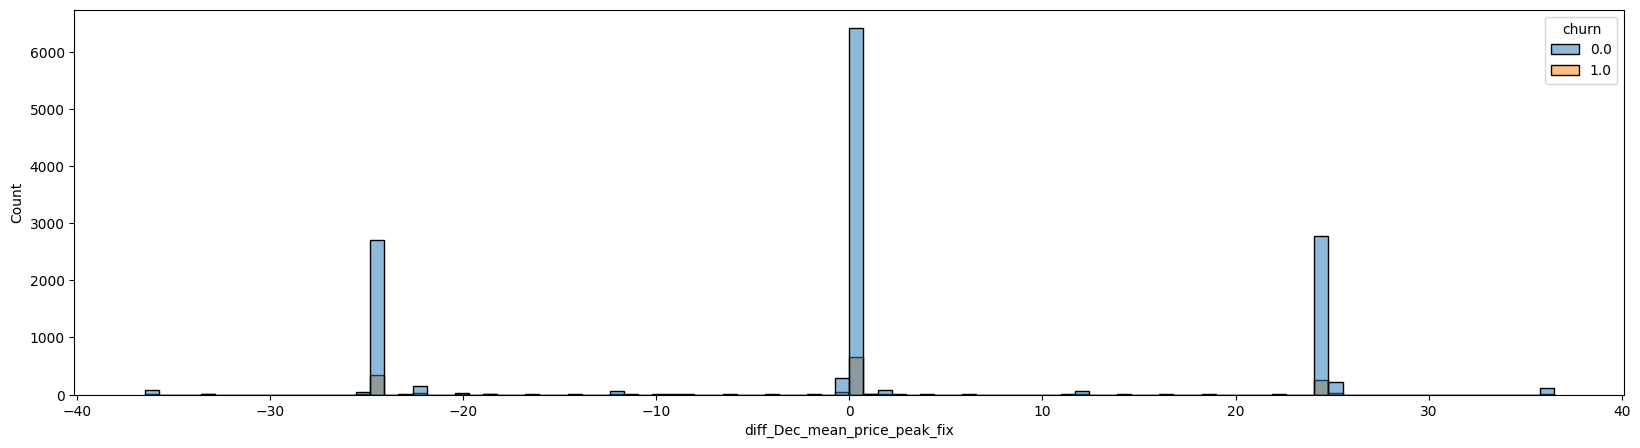

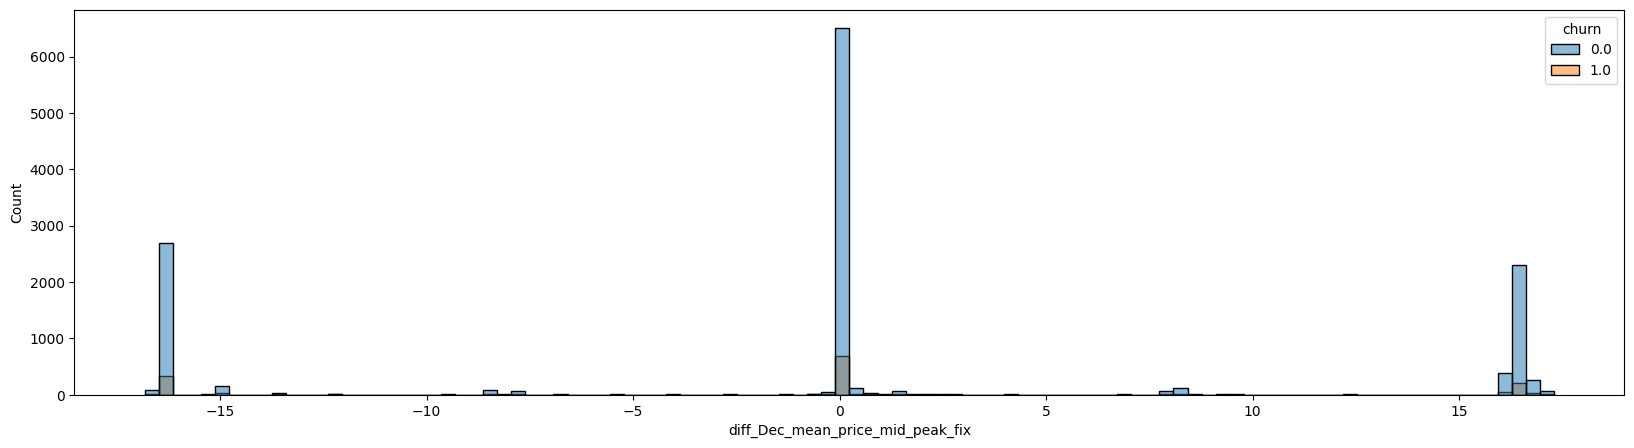

In [47]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

<font size="3"> Check whether changes in prices would affect customer churn (only considering off peak prices)

<font size="3"> Among the cutomers whose off-peak enery prices increased, around 9.72% of customers changed their providers.

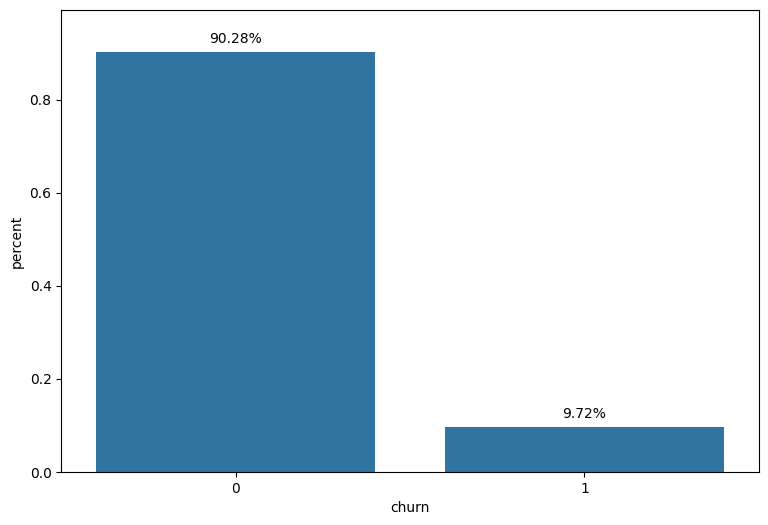

In [48]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

<font size="3"> Among the cutomers whose off-peak energy prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

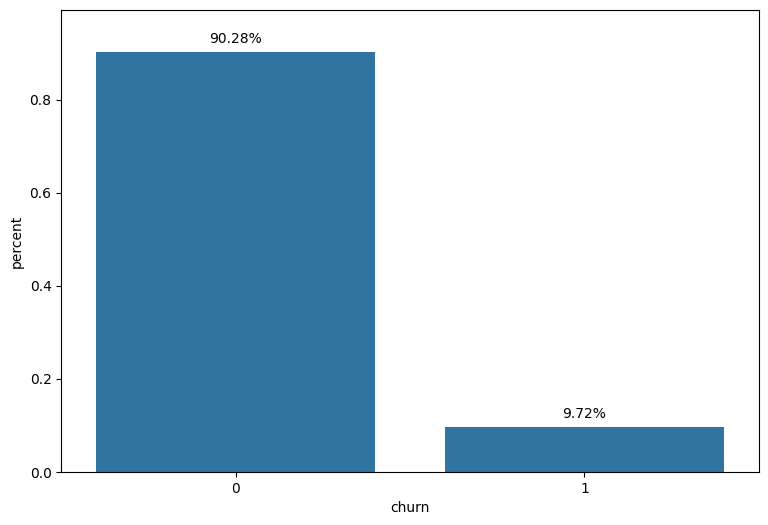

In [49]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

<font size="3"> Among the cutomers whose off-peak power prices increased, around 9.72% of customers changed their providers.

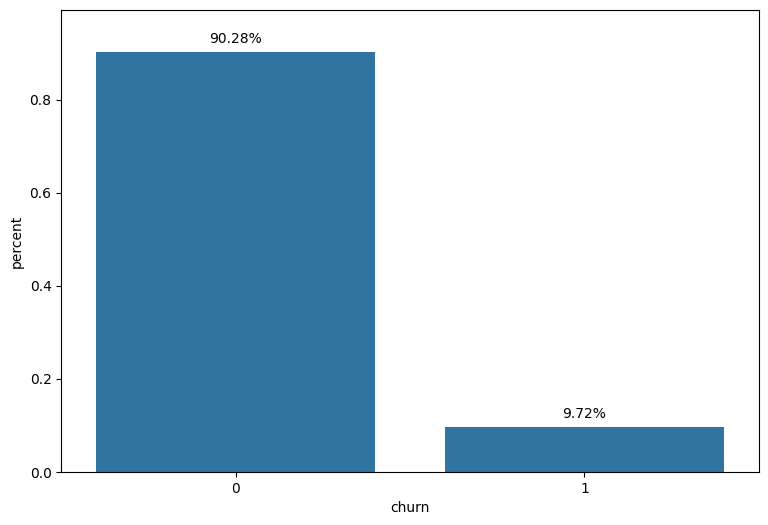

In [50]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

<font size="3"> Among the cutomers whose off-peak enery prices did not increase (decreased or did not change), also around 9.72% of customers changed their providers.

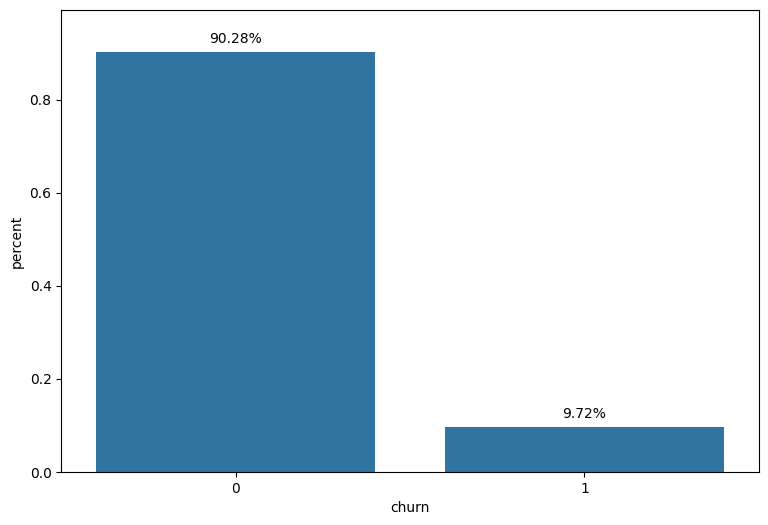

In [51]:
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

<font size="3"> **From the above results, we can see no matter how prices changed, proportion of churning customers always stayed around 9.72%. In other words, changes in prices did not affect customer churn. Therefore, we can conclude customers were not sensitive to prices.**

<font size="3"> In order to confirm this conlusion, I continue to compare prices of December with average prices of the last 6 months and 3 months.

In [52]:
price_stat_6_month = price[price['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# add churn values
price_stat_6_month = price_stat_6_month.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,0.024593,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.025932,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.058081,-1.500000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.028590,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,0.024593,3.715825


<font size="3"> If only considering the last 6 months, changes in prices still did not affect customer churn.

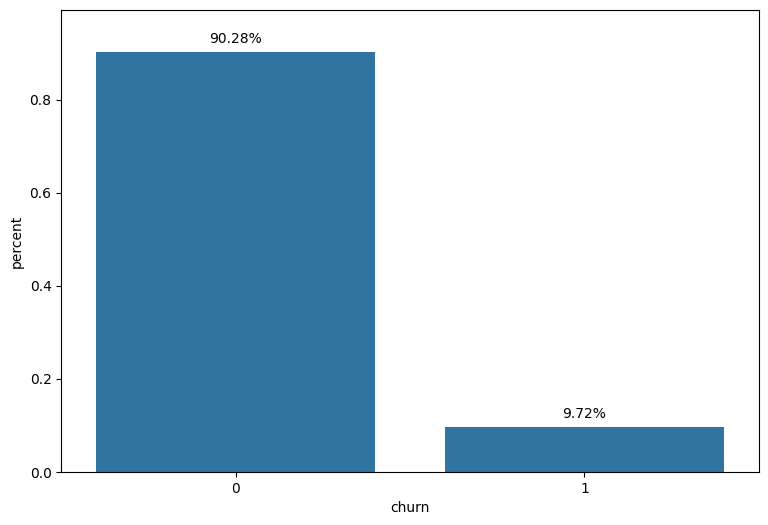

In [53]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

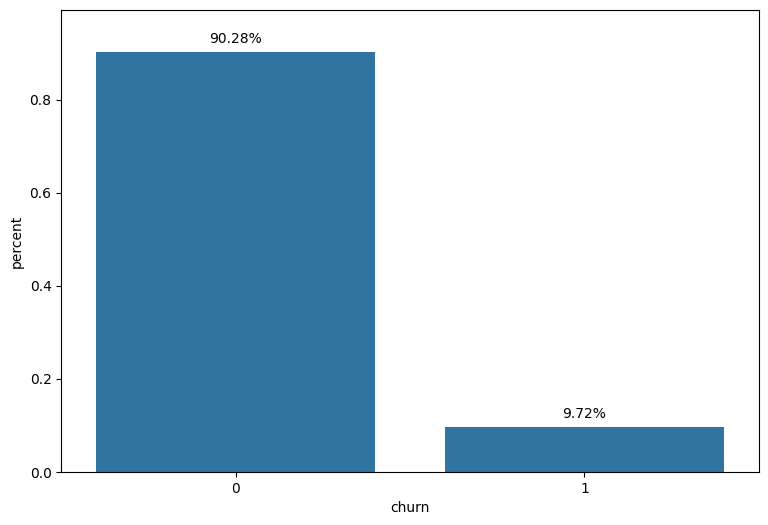

In [54]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

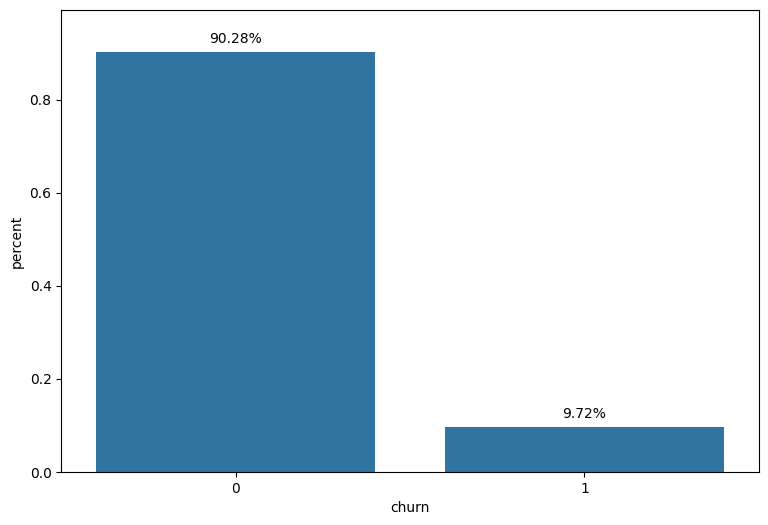

In [55]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

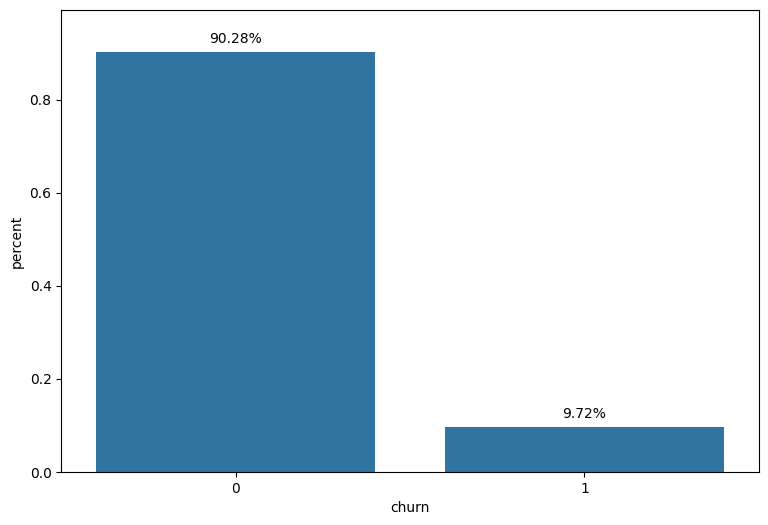

In [56]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

In [57]:
price_stat_3_month = price[price['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_3_month.columns = ['_'.join(x) for x in zip(price_stat_3_month.columns.get_level_values(0), price_stat_3_month.columns.get_level_values(1))]
price_stat_3_month = price_stat_3_month.reset_index()
# add churn values
price_stat_3_month = price_stat_3_month.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat_3_month = price_stat_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_3_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_3_month[f'{attr}_mean']
price_stat_3_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.025953,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,-0.025188,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,-0.057337,-1.500000
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,-0.027846,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.025953,3.715825


<font size="3"> If only considering the last 3 months, changes in prices did not affect customer churn either.

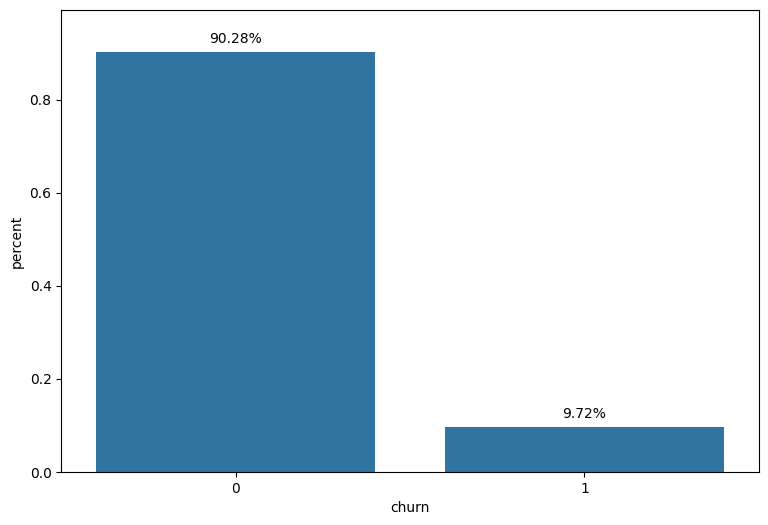

In [58]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

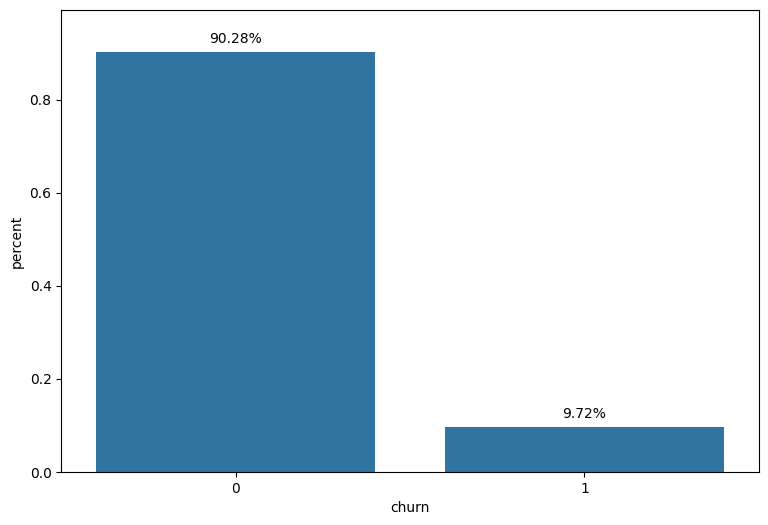

In [59]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

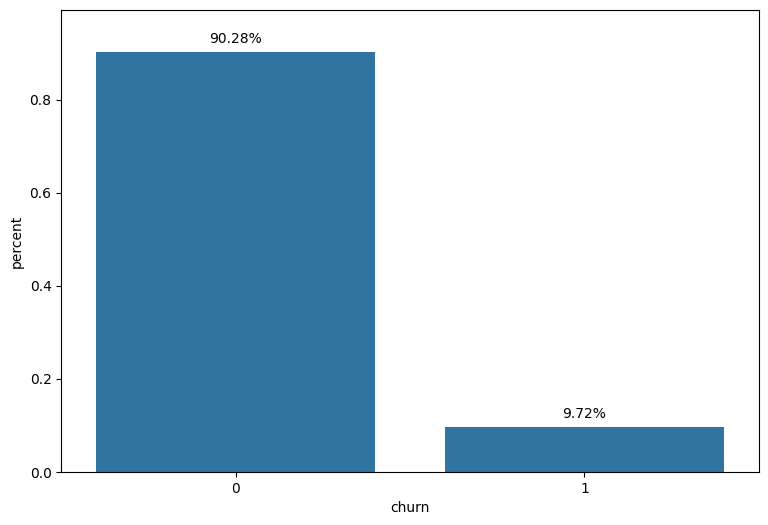

In [60]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

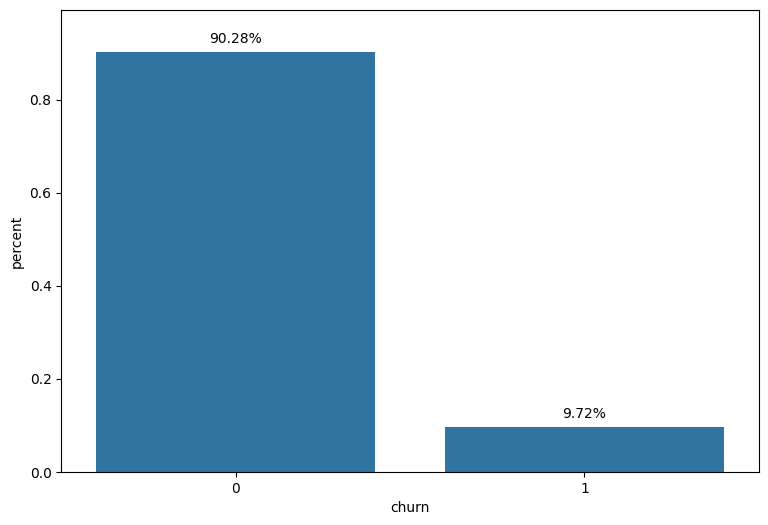

In [61]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

<font size="3"> **From all results above, we can conclude customers were not sensitive to prices.**

### Sub_Task 3

<font size="3"> **Key findings**
    
<font size="3">1. About 9.72% of customers changed providers.
    
<font size="3">2. Numeric variables on consumption are highly skewed.
    
<font size="3">3. Changes in prices does not affect customer churn.
    
<font size="3"> **Suggestions**
    
<font size="3">1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.
    
<font size="3">2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that. 
    
<font size="3">3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn. 
